# Import libraries

In [1]:
# import neurokit2 as nk
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mode

# Utils

In [2]:
def plot_histogram(series, bins=10, title='Histogram', xlabel='Values', ylabel='Frequency'):
    """
    Plots a histogram from a pandas Series.
    
    Parameters:
    series (pd.Series): The data to plot.
    bins (int): Number of bins in the histogram (default is 10).
    title (str): The title of the histogram (default is 'Histogram').
    xlabel (str): The label for the x-axis (default is 'Values').
    ylabel (str): The label for the y-axis (default is 'Frequency').
    """
    plt.figure(figsize=(10, 6))
    plt.hist(series, bins=bins, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
def scatter_plot_feature(dataframe, feature, num_points=100, title='Scatter Plot', xlabel='Index', ylabel='Value'):
    """
    Creates a scatter plot for a specified feature.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    feature (str): The name of the feature column to plot.
    num_points (int): The number of points to plot (default is 100).
    title (str): The title of the plot (default is 'Scatter Plot').
    xlabel (str): The label for the x-axis (default is 'Index').
    ylabel (str): The label for the y-axis (default is 'Value').
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(range(num_points), dataframe[feature][0:num_points], alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
    
def scatter_plot_feature_with_label(dataframe, feature, label, num_points=100, title='Scatter Plot with Labels', xlabel='Index', ylabel='Value'):
    """
    Creates a scatter plot for a specified feature and the label values.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    feature (str): The name of the feature column to plot.
    label (str): The name of the label column to plot.
    num_points (int): The number of points to plot (default is 100).
    title (str): The title of the plot (default is 'Scatter Plot with Labels').
    xlabel (str): The label for the x-axis (default is 'Index').
    ylabel (str): The label for the y-axis (default is 'Value').
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(range(num_points), dataframe[feature][0:num_points], alpha=0.6, label=feature, marker='o')
    plt.scatter(range(num_points), dataframe[label][0:num_points], alpha=0.6, label=label, marker='x')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_feature_with_label(dataframe, feature, label, num_points=100, title='Scatter Plot with Labels', xlabel='Index', ylabel='Value'):
    """
    Creates a scatter plot for a specified feature and the label values.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    feature (str): The name of the feature column to plot.
    label (str): The name of the label column to plot.
    num_points (int): The number of points to plot (default is 100).
    title (str): The title of the plot (default is 'Scatter Plot with Labels').
    xlabel (str): The label for the x-axis (default is 'Index').
    ylabel (str): The label for the y-axis (default is 'Value').
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_points), dataframe[feature][0:num_points], alpha=0.6, label=feature)
    plt.plot(range(num_points), dataframe[label][0:num_points], alpha=0.8, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
def plot_feature(dataframe, feature, num_points=100, title='Scatter Plot', xlabel='Index', ylabel='Value'):
    """
    Creates a scatter plot for a specified feature.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    feature (str): The name of the feature column to plot.
    num_points (int): The number of points to plot (default is 100).
    title (str): The title of the plot (default is 'Scatter Plot').
    xlabel (str): The label for the x-axis (default is 'Index').
    ylabel (str): The label for the y-axis (default is 'Value').
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_points), dataframe[feature][0:num_points])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
    
def split_in_windows(signal, window_size, overlap = 0) : 
    step_size = window_size - overlap
    windows = [] 
    for i in range(0, len(signal), step_size) : 
        temp = signal[i : i + step_size] 
        if len(temp) == window_size : 
            windows.append(temp)
            
    return np.array(windows)

def label_for_window(labels) : 
    res = []
    for label in labels : 
        mode_values = mode(label, axis=0)
        labels_per_win = mode_values.mode.flatten()[0]
        res.append(labels_per_win) 
        
    return np.array(res)

# Load Physio Data 

In [14]:
bvp_df = pd.read_csv("./src/notebooks/data/BVP.csv", sep=';')
acc_df = pd.read_csv("./src/notebooks/data/ACC.csv", sep=';')
temp_df = pd.read_csv("./src/notebooks/data/TEMP.csv", sep=';')
eda_df = pd.read_csv("./src/notebooks/data/EDA.csv", sep=';')

In [9]:
bvp_df = pd.read_csv("./src/notebooks/data/BVP.csv", sep=';')
acc_df = pd.read_csv("./src/notebooks/data/ACC.csv", sep=';')
temp_df = pd.read_csv("./src/notebooks/data/TEMP.csv", sep=';')
eda_df = pd.read_csv("./src/notebooks/data/f_eda_df.csv", sep=';')

In [15]:
acc_df['magnitude'] = np.sqrt(acc_df['x_axis']**2 + acc_df['y_axis']**2 + acc_df['z_axis']**2)

In [18]:
bvp_df.subject.unique().shape

(63,)

In [21]:
physio_df = pd.read_csv("./src/notebooks/data/labeled_features_win1.csv", sep=";")

In [23]:
physio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36918 entries, 0 to 36917
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EDAmean        36918 non-null  float64
 1   EDAstd         36918 non-null  float64
 2   EDAmin         36918 non-null  float64
 3   EDAmax         36918 non-null  float64
 4   trial          36918 non-null  object 
 5   subject        36918 non-null  object 
 6   TEMPmean       36918 non-null  float64
 7   TEMPstd        36918 non-null  float64
 8   TEMPslope      36918 non-null  float64
 9   x_axismean     36918 non-null  float64
 10  x_axisstd      36918 non-null  float64
 11  x_axismin      36918 non-null  int64  
 12  x_axismax      36918 non-null  int64  
 13  y_axismean     36918 non-null  float64
 14  y_axisstd      36918 non-null  float64
 15  y_axismin      36918 non-null  int64  
 16  y_axismax      36918 non-null  int64  
 17  z_axismean     36918 non-null  float64
 18  z_axis

# Load Cpt Data

In [112]:
cpt_df = pd.read_excel("./src/notebooks/data/Cpt_data.xlsx")

In [5]:
cpt_df.head()

,ID,Essai,Temps Experience,Temps total Inactivite,Temps total Activite,Temps total de Manipulation,Nbr Total de Manipulation,Temps Total Consultation Instruction,Nb Total de Consultation,Nombre erreur,Proposition_Phase
0,ID10,1,96.099953,55.673687,40.426266,22.837461,23,17.58880,24,5,1
1,ID10,2,54.533314,31.585220,22.948090,22.248150,21,0.69994,2,1,2
2,ID10,3,41.166672,24.883051,16.283621,16.283621,15,0.00000,0,0,2
3,ID10,4,42.422218,22.697981,19.724239,19.724239,19,0.00000,0,0,3
4,ID10,5,33.722225,18.840277,14.881948,14.881948,17,0.00000,0,0,3


<Axes: >

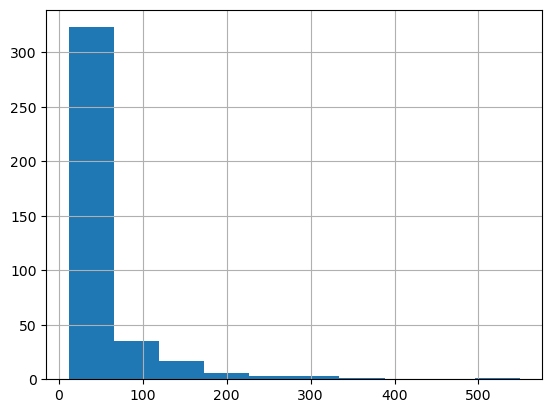

In [6]:
cpt_df['Temps total Activite'].hist()

In [236]:
cpt_df.ID.unique()

array(['ID10', 'ID12', 'ID14', 'ID15', 'ID16', 'ID17', 'ID18', 'ID19',
       'ID20', 'ID21', 'ID22', 'ID23', 'ID24', 'ID25', 'ID26', 'ID27',
       'ID28', 'ID29', 'ID30', 'ID31', 'ID32', 'ID33', 'ID34', 'ID35',
       'ID36', 'ID37', 'ID38', 'ID39', 'ID40', 'ID41', 'ID42', 'ID43',
       'ID44', 'ID45', 'ID46', 'ID47', 'ID48', 'ID49', 'ID50', 'ID51',
       'ID52', 'ID53', 'ID54', 'ID55', 'ID56', 'ID57', 'ID58', 'ID59',
       'ID60', 'ID62', 'ID63', 'ID64', 'ID65', 'ID66', 'ID67', 'ID68',
       'ID69', 'ID70', 'ID71', 'ID9'], dtype=object)

# Data Inspection

In [42]:
def plot_cpt_data(feature : str ) : 
    unique_ids = cpt_df["ID"].unique()

    num_ids = len(unique_ids)
    num_cols = 3
    num_rows = (num_ids + num_cols - 1) // num_cols  # Ceiling division to get the number of rows needed

    # Create a new figure with a larger size
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))

    # Plot each ID's data
    for idx, id in enumerate(unique_ids):
        filtered_df = cpt_df[cpt_df["ID"] == id]
        ax = axes.flatten()[idx]
        ax.bar(filtered_df["Essai"], filtered_df[feature])
        ax.set_title(f"Subject: {id}")
        ax.set_xlabel("Essai")
        ax.set_ylabel(feature)
        ax.grid(True)

    # Remove empty subplots
    for j in range(idx + 1, len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

- Plot the evolution of Temps total Activite


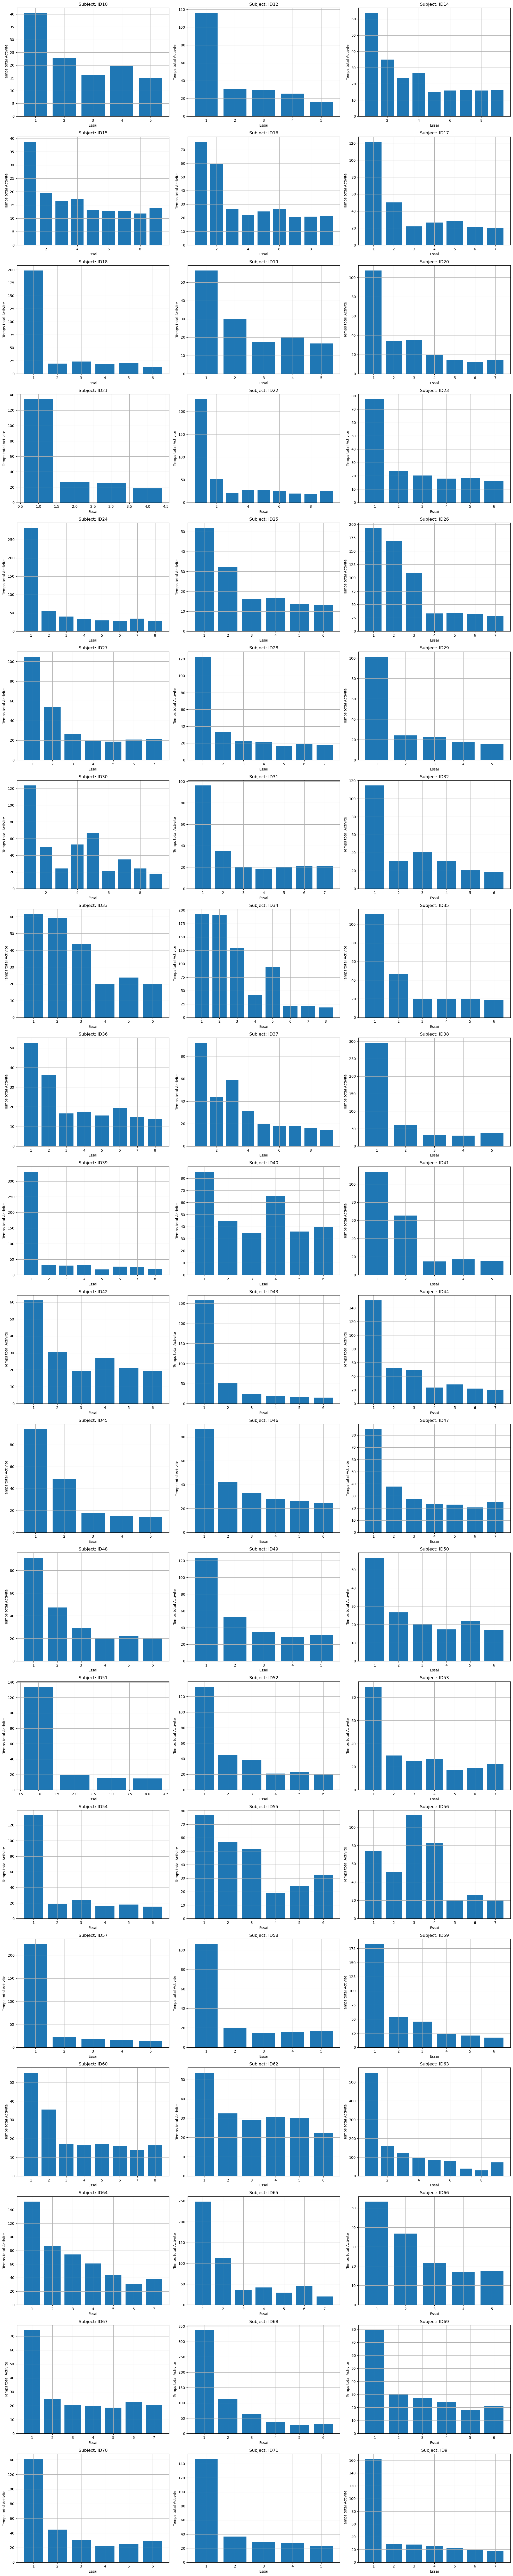

In [48]:
## Plot the evolution of Temps total Activite

print(f"- Plot the evolution of Temps total Activite")
plot_cpt_data('Temps total Activite')

In [30]:
cpt_df[cpt_df["ID"] == "ID10"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    5 non-null      object 
 1   Essai                                 5 non-null      int64  
 2   Temps Experience                      5 non-null      float64
 3   Temps total Inactivite                5 non-null      float64
 4   Temps total Activite                  5 non-null      float64
 5   Temps total de Manipulation           5 non-null      float64
 6   Nbr Total de Manipulation             5 non-null      int64  
 7   Temps Total Consultation Instruction  5 non-null      float64
 8   Nb Total de Consultation              5 non-null      int64  
 9   Nombre erreur                         5 non-null      int64  
 10  Proposition_Phase                     5 non-null      int64  
dtypes: float64(5), int64(5), obj

In [114]:
cpt_df

,ID,Essai,Temps Experience,Temps total Inactivite,Temps total Activite,Temps total de Manipulation,Nbr Total de Manipulation,Temps Total Consultation Instruction,Nb Total de Consultation,Nombre erreur,Proposition_Phase,subject
0,ID10,1,96.099953,55.673687,40.426266,22.837461,23,17.58880,24,5,1,S10
1,ID10,2,54.533314,31.585220,22.948090,22.248150,21,0.69994,2,1,2,S10
2,ID10,3,41.166672,24.883051,16.283621,16.283621,15,0.00000,0,0,2,S10
3,ID10,4,42.422218,22.697981,19.724239,19.724239,19,0.00000,0,0,3,S10
4,ID10,5,33.722225,18.840277,14.881948,14.881948,17,0.00000,0,0,3,S10
...,...,...,...,...,...,...,...,...,...,...,...,...
384,ID9,3,53.544449,25.779648,27.764799,25.764799,14,2.00000,3,0,2,S9
385,ID9,4,48.744450,23.301680,25.442772,24.987211,15,0.45556,1,0,2,S9
386,ID9,5,43.344448,20.241940,23.102510,23.102510,14,0.00000,0,0,2,S9
387,ID9,6,40.733341,21.255289,19.478050,19.478050,14,0.00000,0,0,3,S9


# Remove noisy subjects 

In [113]:
# reformat the dataframe 

cpt_df['subject'] = cpt_df.ID.str.replace("ID", 'S')

In [114]:
print("Before filtering: ")
print(f"eda_df.subject.unique().shape : {eda_df.subject.unique().shape}")
print(f"cpt_df.subject.unique().shape : {cpt_df.subject.unique().shape}")

Before filtering: 
eda_df.subject.unique().shape : (32,)
cpt_df.subject.unique().shape : (60,)


In [115]:
f_cpt_df = pd.DataFrame() 

for subject in eda_df.subject.unique() : 
    for trial in eda_df[eda_df['subject'] == subject].trial.unique() : 
        f_cpt_df = pd.concat([f_cpt_df, cpt_df[(cpt_df['subject'] == subject) & (cpt_df['Essai'] == trial)]])

In [116]:
f_cpt_df.subject.unique().shape

(32,)

In [25]:
print("- Before filtering: ")
print(f"eda_df.subject.unique().shape : {eda_df.subject.unique().shape}")
print(f"cpt_df.subject.unique().shape : {cpt_df.subject.unique().shape}")
print("- After filtering: ")
print(f"eda_df.subject.unique().shape : {eda_df.subject.unique().shape}")
print(f"f_cpt_df.subject.unique().shape : {f_cpt_df.subject.unique().shape}")

- Before filtering: 
eda_df.subject.unique().shape : (32,)
cpt_df.subject.unique().shape : (60,)
- After filtering: 
eda_df.subject.unique().shape : (32,)
f_cpt_df.subject.unique().shape : (32,)


# Data Visualization

In [14]:
f_cpt_df.columns

Index(['ID', 'Essai', 'Temps Experience', 'Temps total Inactivite',
       'Temps total Activite', 'Temps total de Manipulation',
       'Nbr Total de Manipulation', 'Temps Total Consultation Instruction',
       'Nb Total de Consultation', 'Nombre erreur', 'Proposition_Phase',
       'subject'],
      dtype='object')

<Axes: >

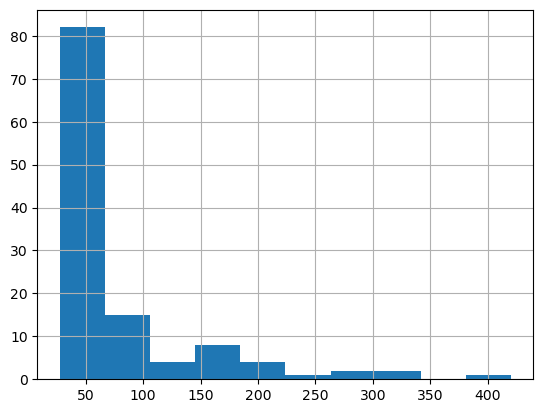

In [15]:
f_cpt_df['Temps Experience'].hist()

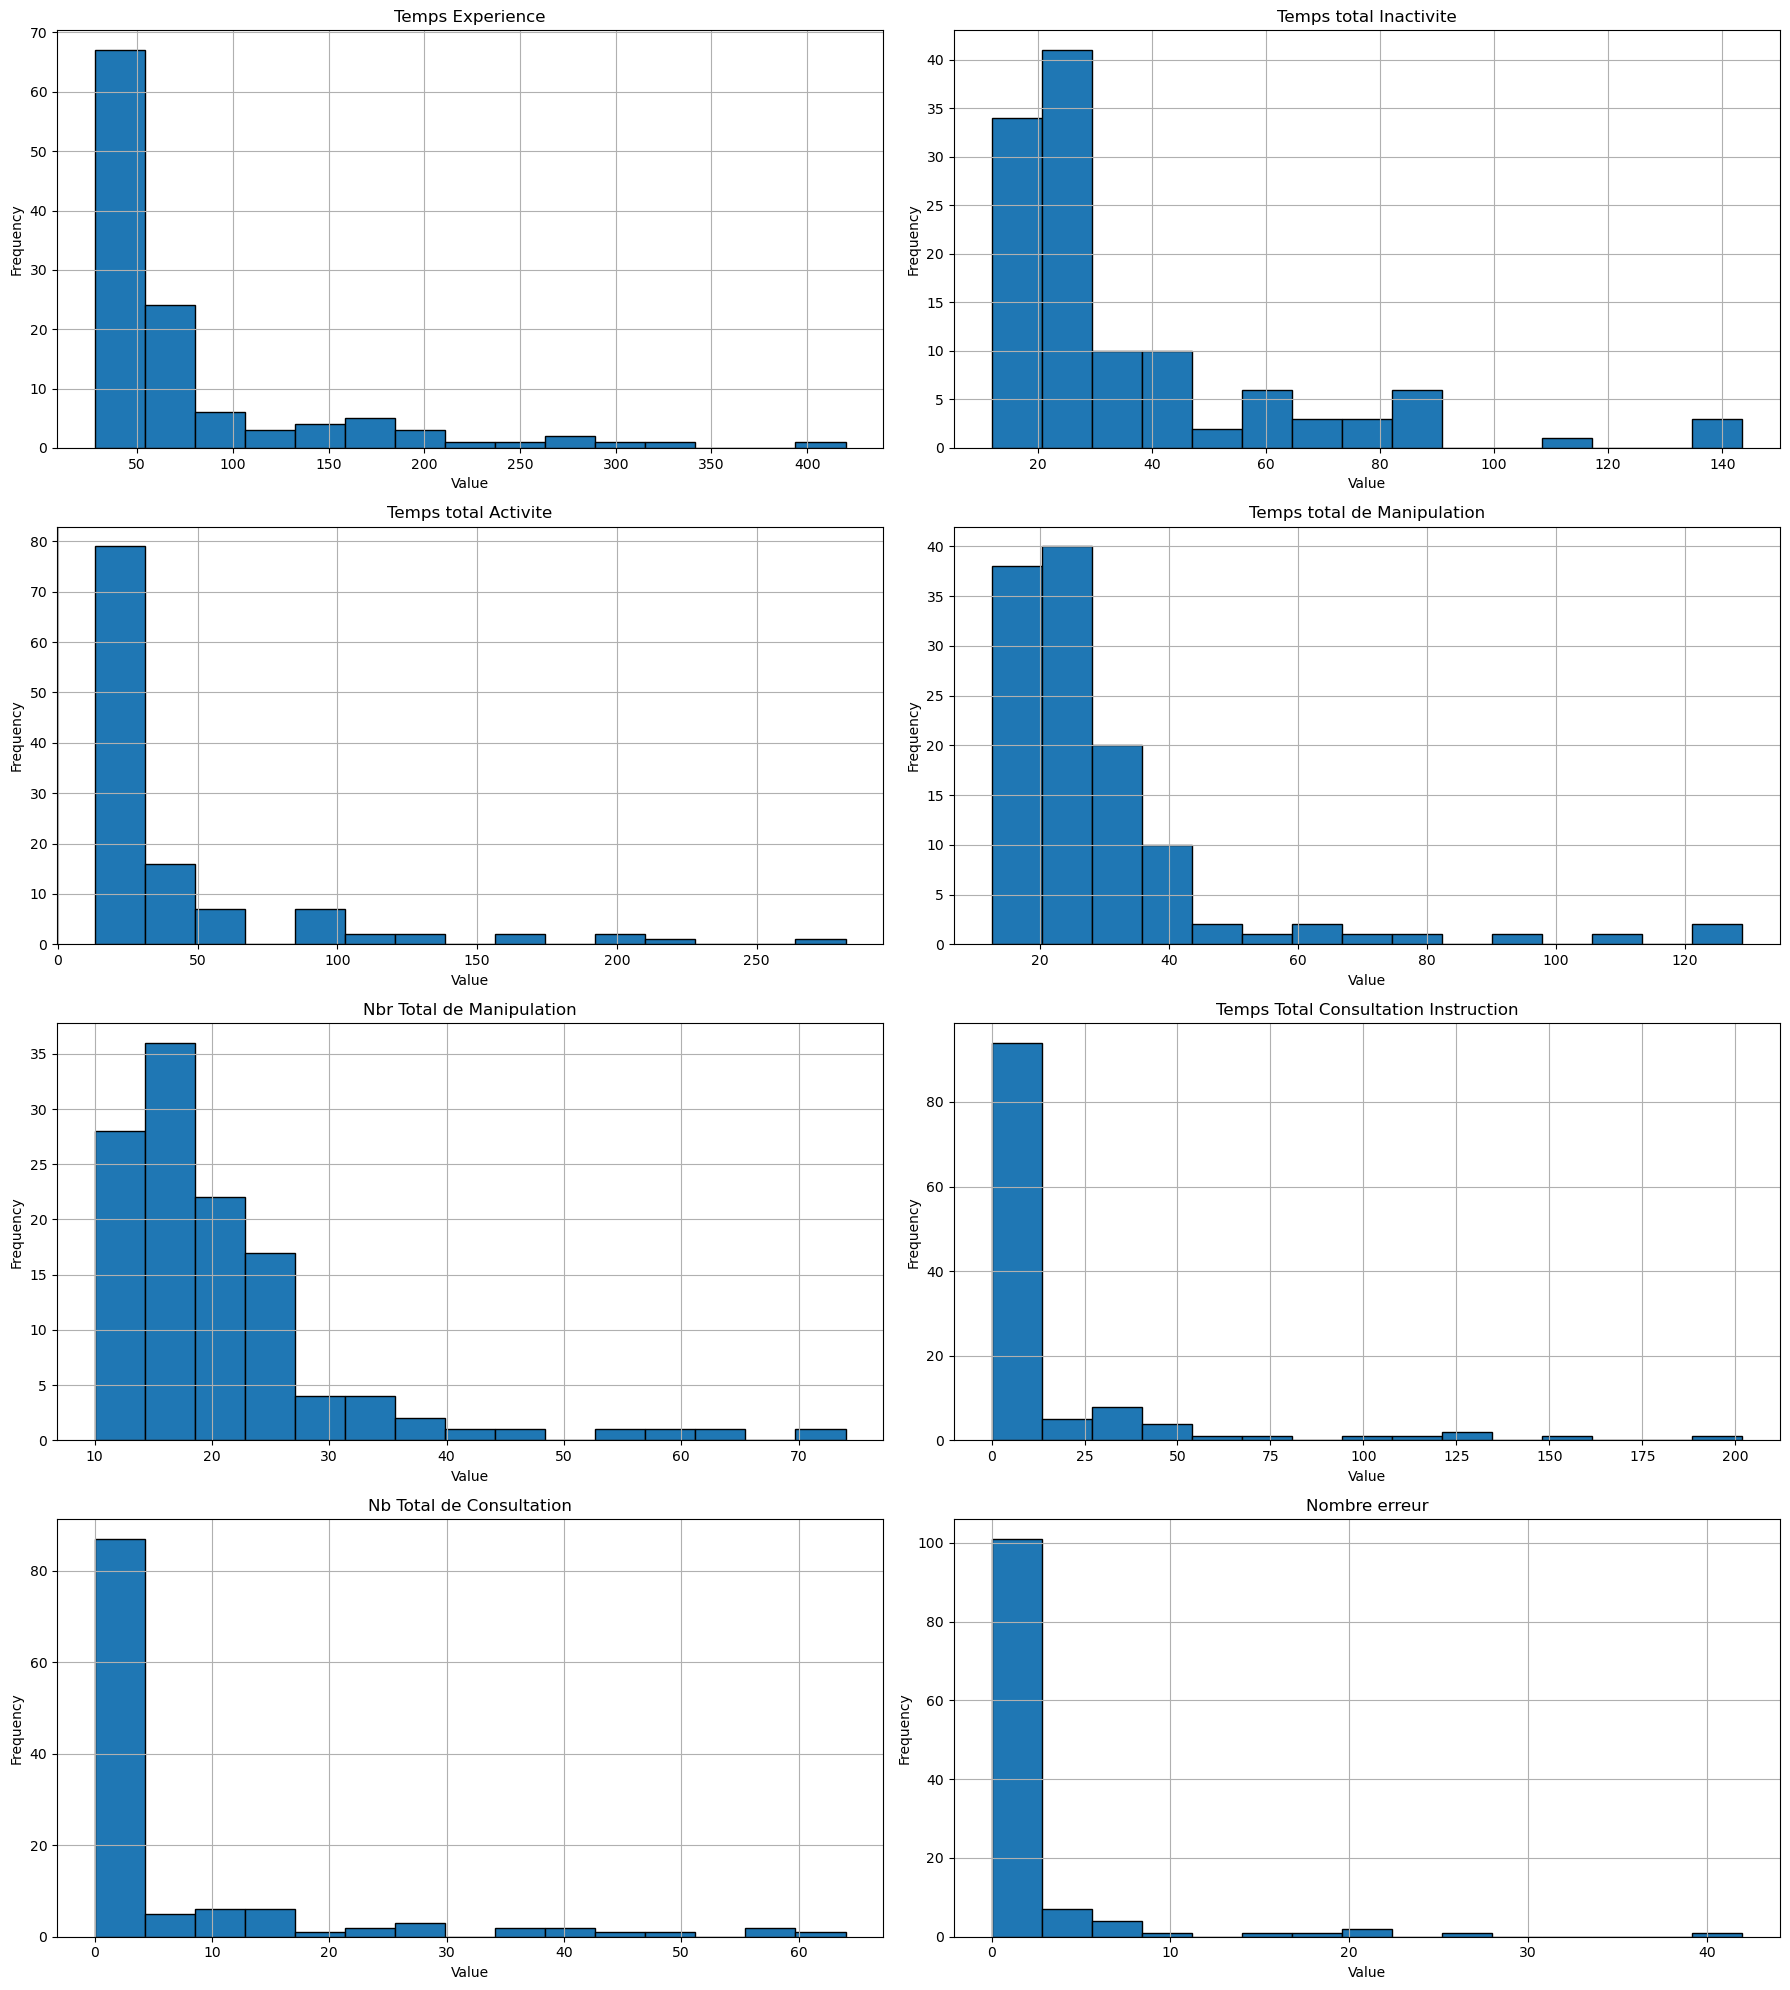

In [305]:
columns_to_plot = [
    'Temps Experience', 'Temps total Inactivite', 'Temps total Activite', 
    'Temps total de Manipulation', 'Nbr Total de Manipulation', 
    'Temps Total Consultation Instruction', 'Nb Total de Consultation', 
    'Nombre erreur'
]

# Determine the number of rows needed
num_columns = 2
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns

# Create a new figure with a larger size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18, num_rows * 5))

# Plot each column as a histogram
for idx, column in enumerate(columns_to_plot):
    ax = axes.flatten()[idx]
    f_cpt_df[column].hist(ax=ax, bins=15, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Data preparation

In [16]:
def get_first_last_trial(signal_df) : 

    signal_lst = []

    for subject in signal_df.subject.unique() : 
        print(f'subject : {subject}') 
        trials = signal_df[signal_df['subject'] == subject]['trial'].unique()
        print(f'trials : {trials}')
        first_trial = trials[0]
        last_trial = trials[trials.shape[0] - 1]
        print(f'first_trial : {first_trial}, last_trial: {last_trial}')
        filtered = signal_df[(signal_df['subject'] == subject) & ((signal_df['trial'] == first_trial) | (signal_df['trial'] == last_trial))]
        print(f'signal: {filtered.columns[2]} subject : {filtered.subject.unique()}, trials : {filtered.trial.unique()}')
        signal_lst.append(filtered)
        
    filtered_df = pd.DataFrame() 

    for df in signal_lst : 
        print(f'df_subject : {df.subject.unique()} df_trial : {df.trial.unique()}')
        filtered_df = pd.concat([filtered_df, df]) 
          
        
    print(f"signal: {signal_df.columns[2]} subject : S10, filtered : {filtered_df[filtered_df['subject'] == 'S10'].trial.unique()}")
    return filtered_df



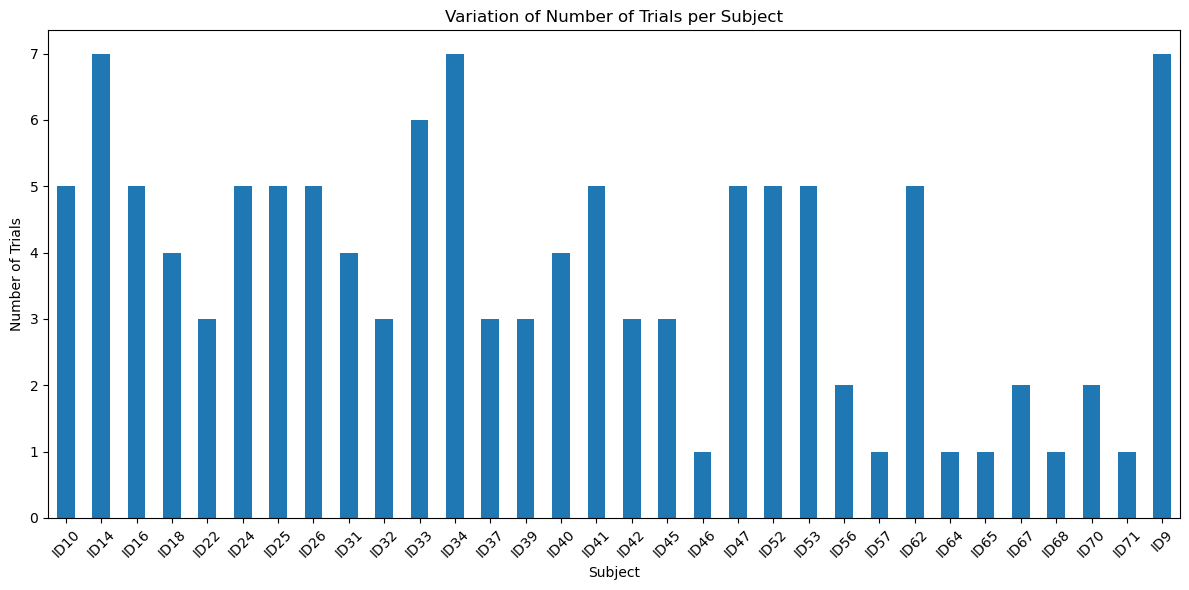

In [117]:
trials_per_subject = f_cpt_df.groupby("ID")['Essai'].nunique()

plt.figure(figsize=(12, 6))
trials_per_subject.plot(kind='bar')
plt.xlabel("Subject")
plt.ylabel("Number of Trials")
plt.title("Variation of Number of Trials per Subject")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [118]:
f_cpt_df['subject'] = cpt_df.ID.str.replace('ID', 'S')

In [119]:
f_cpt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 0 to 388
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    119 non-null    object 
 1   Essai                                 119 non-null    int64  
 2   Temps Experience                      119 non-null    float64
 3   Temps total Inactivite                119 non-null    float64
 4   Temps total Activite                  119 non-null    float64
 5   Temps total de Manipulation           119 non-null    float64
 6   Nbr Total de Manipulation             119 non-null    int64  
 7   Temps Total Consultation Instruction  119 non-null    float64
 8   Nb Total de Consultation              119 non-null    int64  
 9   Nombre erreur                         119 non-null    int64  
 10  Proposition_Phase                     119 non-null    int64  
 11  subject                 

In [120]:
nbr_subject = 0 # Number of subject that do not have trial one. 
lst_subjects = []
for subject in f_cpt_df.subject.unique() : 
    if ( 1 in f_cpt_df[f_cpt_df['subject'] == subject].Essai.unique() ) == False : 
        print(f"subject {subject} does not have the first trial")
        print(f"{subject} trials {f_cpt_df[f_cpt_df['subject'] == subject].Essai.unique()}")
        nbr_subject += 1 
        lst_subjects.append(subject)
        

print(f'------------------------------------------------------------')   
print(f'Proportion of subjects without trial one signals : {(nbr_subject / eda_df.subject.unique().shape[0]) * 100}%')     
print(f'Number of subjects without trial one signals : {nbr_subject}')
print(f'List of subjects without trial one signals : {lst_subjects}')

subject S14 does not have the first trial
S14 trials [2 3 4 5 6 8 9]
subject S16 does not have the first trial
S16 trials [5 6 7 8 9]
subject S18 does not have the first trial
S18 trials [2 3 4 6]
subject S22 does not have the first trial
S22 trials [6 8 9]
subject S32 does not have the first trial
S32 trials [2 4 6]
subject S37 does not have the first trial
S37 trials [4 6 9]
subject S39 does not have the first trial
S39 trials [4 5 6]
subject S42 does not have the first trial
S42 trials [3 5 6]
subject S46 does not have the first trial
S46 trials [5]
subject S56 does not have the first trial
S56 trials [6 7]
subject S64 does not have the first trial
S64 trials [2]
subject S65 does not have the first trial
S65 trials [7]
subject S67 does not have the first trial
S67 trials [5 6]
subject S68 does not have the first trial
S68 trials [5]
subject S70 does not have the first trial
S70 trials [5 6]
subject S71 does not have the first trial
S71 trials [5]
------------------------------------

In [122]:
keep_subject_lst = []
for subject in eda_df.subject.unique() : 
    if ( 1 in eda_df[eda_df['subject'] == subject].trial.unique() ) == True : 
        print(f'subject {subject} have the first trial')
        print(f"{subject} trials {eda_df[eda_df['subject'] == subject].trial.unique()}")
        keep_subject_lst.append(subject)
        
        
print(f'----------------------------------------------------------')
print(f'subjects with the signals of the first trial : {keep_subject_lst}')

subject S10 have the first trial
S10 trials [1 2 3 4 5]
subject S24 have the first trial
S24 trials [1 2 5 7 8]
subject S25 have the first trial
S25 trials [1 2 3 4 5]
subject S26 have the first trial
S26 trials [1 2 3 4 6]
subject S31 have the first trial
S31 trials [1 4 5 6]
subject S33 have the first trial
S33 trials [1 2 3 4 5 6]
subject S34 have the first trial
S34 trials [1 3 4 5 6 7 8]
subject S40 have the first trial
S40 trials [1 3 4 6]
subject S41 have the first trial
S41 trials [1 2 3 4 5]
subject S45 have the first trial
S45 trials [1 2 5]
subject S47 have the first trial
S47 trials [1 2 3 4 7]
subject S52 have the first trial
S52 trials [1 3 4 5 6]
subject S53 have the first trial
S53 trials [1 3 4 6 7]
subject S57 have the first trial
S57 trials [1]
subject S62 have the first trial
S62 trials [1 2 3 4 5]
subject S9 have the first trial
S9 trials [1 2 3 4 5 6 7]
----------------------------------------------------------
subjects with the signals of the first trial : ['S10'

In [123]:
# eda_df_f = eda_df[eda_df['subject'].isin(keep_subject_lst)]
# # smna_df_f = smna_df[smna_df['subject'].isin(keep_subject_lst)]
# bvp_df_f = bvp_df[bvp_df['subject'].isin(keep_subject_lst)]
# acc_df_f = acc_df[acc_df['subject'].isin(keep_subject_lst)]
# temp_df_f = temp_df[temp_df['subject'].isin(keep_subject_lst)]
f_cpt_df_f = f_cpt_df[f_cpt_df['subject'].isin(keep_subject_lst)]

In [124]:
f_cpt_df_f

,ID,Essai,Temps Experience,Temps total Inactivite,Temps total Activite,Temps total de Manipulation,Nbr Total de Manipulation,Temps Total Consultation Instruction,Nb Total de Consultation,Nombre erreur,Proposition_Phase,subject
0,ID10,1,96.099953,55.673687,40.426266,22.837461,23,17.58880,24,5,1,S10
1,ID10,2,54.533314,31.585220,22.948090,22.248150,21,0.69994,2,1,2,S10
2,ID10,3,41.166672,24.883051,16.283621,16.283621,15,0.00000,0,0,2,S10
3,ID10,4,42.422218,22.697981,19.724239,19.724239,19,0.00000,0,0,3,S10
4,ID10,5,33.722225,18.840277,14.881948,14.881948,17,0.00000,0,0,3,S10
...,...,...,...,...,...,...,...,...,...,...,...,...
384,ID9,3,53.544449,25.779648,27.764799,25.764799,14,2.00000,3,0,2,S9
385,ID9,4,48.744450,23.301680,25.442772,24.987211,15,0.45556,1,0,2,S9
386,ID9,5,43.344448,20.241940,23.102510,23.102510,14,0.00000,0,0,2,S9
387,ID9,6,40.733341,21.255289,19.478050,19.478050,14,0.00000,0,0,3,S9


In [34]:
f_cpt_df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 388
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    77 non-null     object 
 1   Essai                                 77 non-null     int64  
 2   Temps Experience                      77 non-null     float64
 3   Temps total Inactivite                77 non-null     float64
 4   Temps total Activite                  77 non-null     float64
 5   Temps total de Manipulation           77 non-null     float64
 6   Nbr Total de Manipulation             77 non-null     int64  
 7   Temps Total Consultation Instruction  77 non-null     float64
 8   Nb Total de Consultation              77 non-null     int64  
 9   Nombre erreur                         77 non-null     int64  
 10  Proposition_Phase                     77 non-null     int64  
 11  subject                  

In [126]:
f_cpt_df_f.rename(columns={
    "Essai" : "trial",
}, 
inplace=True)
f_cpt_df_f = get_first_last_trial(f_cpt_df_f)

subject : S10
trials : [1 2 3 4 5]
first_trial : 1, last_trial: 5
signal: Temps Experience subject : ['S10'], trials : [1 5]
subject : S24
trials : [1 2 5 7 8]
first_trial : 1, last_trial: 8
signal: Temps Experience subject : ['S24'], trials : [1 8]
subject : S25
trials : [1 2 3 4 5]
first_trial : 1, last_trial: 5
signal: Temps Experience subject : ['S25'], trials : [1 5]
subject : S26
trials : [1 2 3 4 6]
first_trial : 1, last_trial: 6
signal: Temps Experience subject : ['S26'], trials : [1 6]
subject : S31
trials : [1 4 5 6]
first_trial : 1, last_trial: 6
signal: Temps Experience subject : ['S31'], trials : [1 6]
subject : S33
trials : [1 2 3 4 5 6]
first_trial : 1, last_trial: 6
signal: Temps Experience subject : ['S33'], trials : [1 6]
subject : S34
trials : [1 3 4 5 6 7 8]
first_trial : 1, last_trial: 8
signal: Temps Experience subject : ['S34'], trials : [1 8]
subject : S40
trials : [1 3 4 6]
first_trial : 1, last_trial: 6
signal: Temps Experience subject : ['S40'], trials : [1 6

C:\Users\wannatry\AppData\Local\Temp\ipykernel_23228\224982307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_cpt_df_f.rename(columns={


In [127]:
f_cpt_df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 388
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    31 non-null     object 
 1   trial                                 31 non-null     int64  
 2   Temps Experience                      31 non-null     float64
 3   Temps total Inactivite                31 non-null     float64
 4   Temps total Activite                  31 non-null     float64
 5   Temps total de Manipulation           31 non-null     float64
 6   Nbr Total de Manipulation             31 non-null     int64  
 7   Temps Total Consultation Instruction  31 non-null     float64
 8   Nb Total de Consultation              31 non-null     int64  
 9   Nombre erreur                         31 non-null     int64  
 10  Proposition_Phase                     31 non-null     int64  
 11  subject                  

# Data normalization 

In [185]:
f_cpt_df_f.columns

Index(['ID', 'trial', 'Temps Experience', 'Temps total Inactivite',
       'Temps total Activite', 'Temps total de Manipulation',
       'Nbr Total de Manipulation', 'Temps Total Consultation Instruction',
       'Nb Total de Consultation', 'Nombre erreur', 'Proposition_Phase',
       'subject'],
      dtype='object')

In [194]:
f_cpt_df_f[f_cpt_df_f['subject'] == 'S10']['Temps Experience'].var()

variation = []

for subject in f_cpt_df_f.subject.unique() : 
    if f_cpt_df_f[f_cpt_df_f['subject'] == subject]['Temps Experience'].var() != float('nan'):
        print(f"{subject} variations : {f_cpt_df_f[f_cpt_df_f['subject'] == subject]['Temps Experience'].var()}")

        variation.append(f_cpt_df_f[f_cpt_df_f['subject'] == subject]['Temps Experience'].var())

S10 variations : 1945.4904752209918
S24 variations : 67748.81567490041
S25 variations : 2471.822157295458
S26 variations : 41408.025043086425
S31 variations : 9208.757167183223
S33 variations : 6272.001344000073
S34 variations : 30053.343871611203
S40 variations : 8184.890247290124
S41 variations : 14336.887477777813
S45 variations : 7233.376150031483
S47 variations : 5425.353611112992
S52 variations : 14323.734312604083
S53 variations : 8763.398903774483
S57 variations : nan
S62 variations : 2051.55424473556
S9 variations : 22545.079113045744


In [190]:
variation

[1945.4904752209918,
 67748.81567490041,
 2471.822157295458,
 41408.025043086425,
 9208.757167183223,
 6272.001344000073,
 30053.343871611203,
 8184.890247290124,
 14336.887477777813,
 7233.376150031483,
 5425.353611112992,
 14323.734312604083,
 8763.398903774483,
 nan,
 2051.55424473556,
 22545.079113045744]

In [166]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 

columns_to_normalize = [
    'Temps Experience', 'Temps total Inactivite', 'Temps total Activite', 
    'Temps total de Manipulation', 'Nbr Total de Manipulation', 
    'Temps Total Consultation Instruction', 'Nb Total de Consultation', 
    'Nombre erreur'
]

columns_not_norms = ['ID', 'trial',  'Proposition_Phase', 'subject']

cpt_norm_f = pd.DataFrame()
temp = pd.DataFrame()

for subject in f_cpt_df_f.subject.unique() : 
    data = f_cpt_df_f[f_cpt_df_f['subject'] == subject]
    temp = scaler.fit_transform(data[columns_to_normalize])
    data[columns_not_norms] = f_cpt_df_f[f_cpt_df_f['subject'] == subject][columns_not_norms]
    data[columns_to_normalize] = temp
    cpt_norm_f = pd.concat([cpt_norm_f, data])    
    


C:\Users\wannatry\AppData\Local\Temp\ipykernel_23228\455488116.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_not_norms] = f_cpt_df_f[f_cpt_df_f['subject'] == subject][columns_not_norms]
C:\Users\wannatry\AppData\Local\Temp\ipykernel_23228\455488116.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_normalize] = temp
C:\Users\wannatry\AppData\Local\Temp\ipykernel_23228\455488116.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [164]:
cpt_norm_f

,ID,trial,Temps Experience,Temps total Inactivite,Temps total Activite,Temps total de Manipulation,Nbr Total de Manipulation,Temps Total Consultation Instruction,Nb Total de Consultation,Nombre erreur,Proposition_Phase,subject
0,ID10,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,S10
4,ID10,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,S10
81,ID24,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,S24
88,ID24,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,S24
89,ID25,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,S25
93,ID25,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,S25
95,ID26,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,S26
100,ID26,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,S26
130,ID31,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,S31
135,ID31,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,S31


In [136]:
f_cpt_df_f.head(4)

,ID,trial,Temps Experience,Temps total Inactivite,Temps total Activite,Temps total de Manipulation,Nbr Total de Manipulation,Temps Total Consultation Instruction,Nb Total de Consultation,Nombre erreur,Proposition_Phase,subject
0,ID10,1,96.099953,55.673687,40.426266,22.837461,23,17.588800,24,5,1,S10
4,ID10,5,33.722225,18.840277,14.881948,14.881948,17,0.000000,0,0,3,S10
81,ID24,1,420.022247,138.238434,281.783813,125.683510,43,156.100281,57,20,1,S24
88,ID24,8,51.922218,23.735268,28.186953,28.186953,19,0.000000,0,0,3,S24


In [139]:
(420.022247	- np.array([420.022247, 51.922218]).mean()) / np.array([420.022247, 51.922218]).std()

1.0000000000000002

array([[<Axes: title={'center': 'Temps Experience'}>,
        <Axes: title={'center': 'Temps total Inactivite'}>,
        <Axes: title={'center': 'Temps total Activite'}>],
       [<Axes: title={'center': 'Temps total de Manipulation'}>,
        <Axes: title={'center': 'Nbr Total de Manipulation'}>,
        <Axes: title={'center': 'Temps Total Consultation Instruction'}>],
       [<Axes: title={'center': 'Nb Total de Consultation'}>,
        <Axes: title={'center': 'Nombre erreur'}>, <Axes: >]],
      dtype=object)

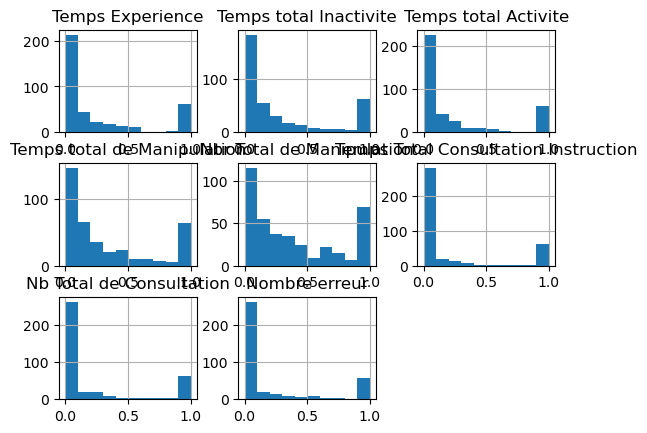

In [75]:
cpt_norm_f[columns_to_normalize].hist()

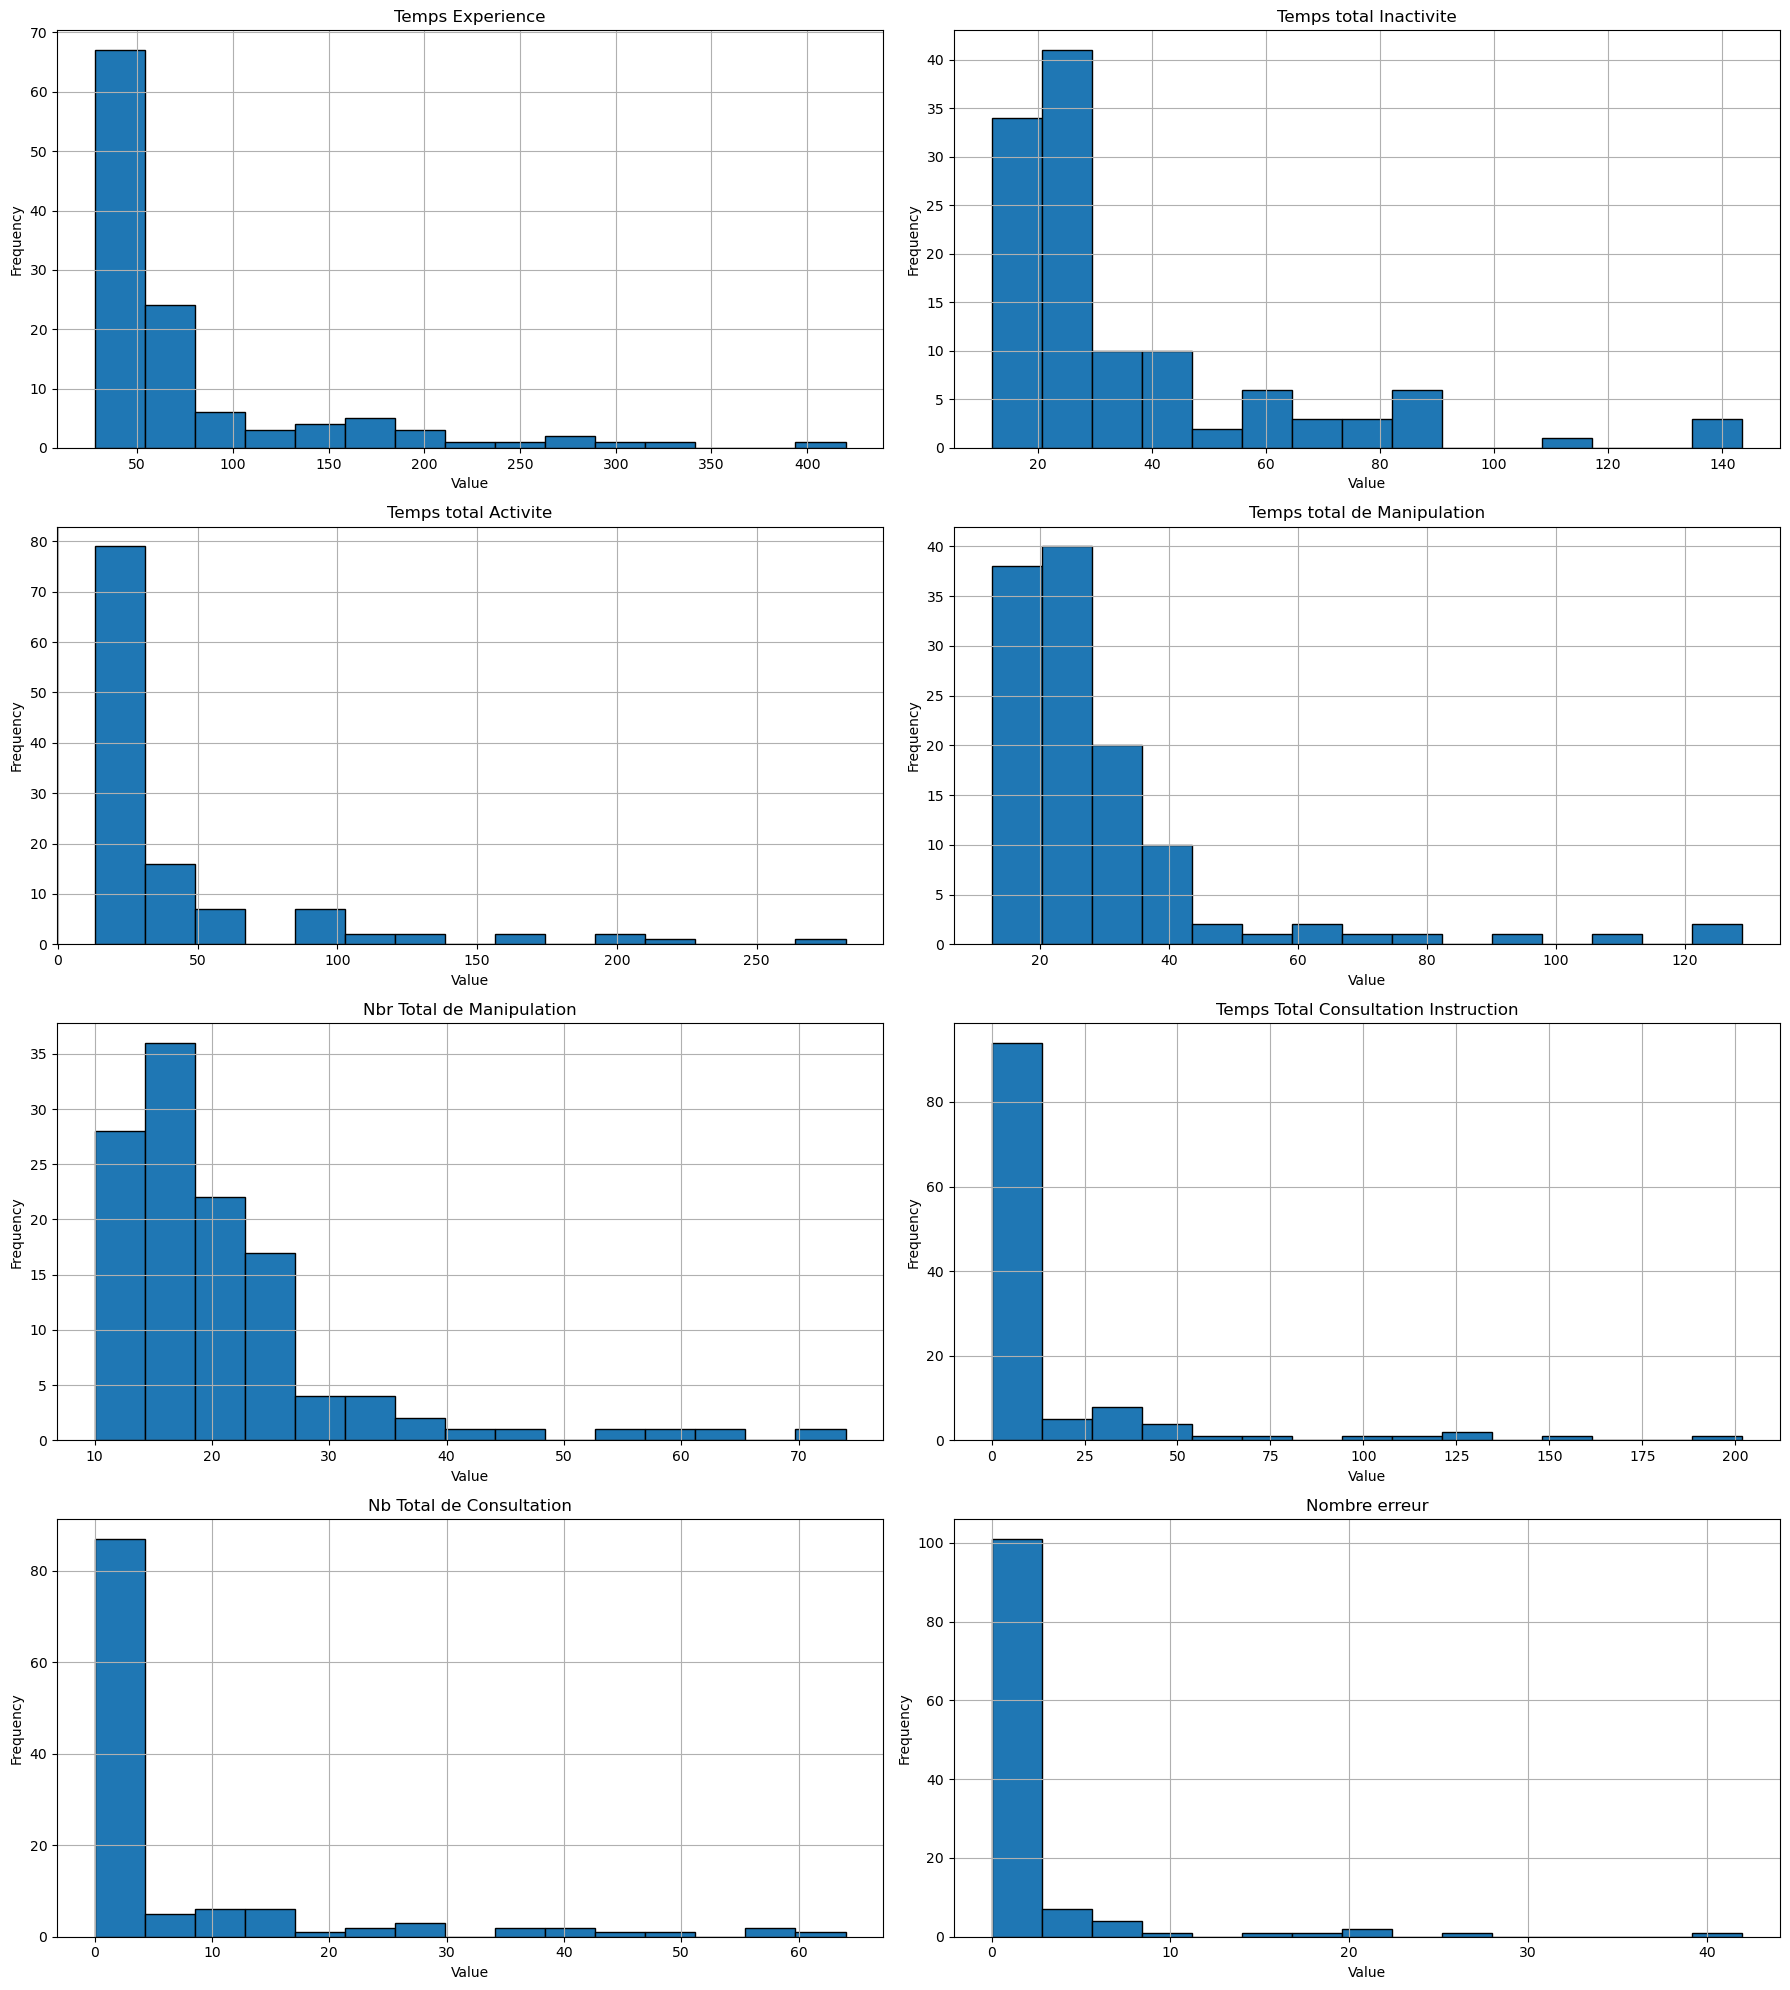

In [310]:
columns_to_plot = [
    'Temps Experience', 'Temps total Inactivite', 'Temps total Activite', 
    'Temps total de Manipulation', 'Nbr Total de Manipulation', 
    'Temps Total Consultation Instruction', 'Nb Total de Consultation', 
    'Nombre erreur'
]

# Determine the number of rows needed
num_columns = 2
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns

# Create a new figure with a larger size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18, num_rows * 5))

# Plot each column as a histogram
for idx, column in enumerate(columns_to_plot):
    ax = axes.flatten()[idx]
    f_cpt_df[column].hist(ax=ax, bins=15, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [277]:
cpt_df_f[columns_to_normalize].describe()

,Temps Experience,Temps total Inactivite,Temps total Activite,Temps total de Manipulation,Nbr Total de Manipulation,Temps Total Consultation Instruction,Nb Total de Consultation,Nombre erreur
count,1.200000e+02,1.200000e+02,1.200000e+02,120.000000,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,4.440892e-17,-7.401487e-18,-7.401487e-17,0.000000,7.401487e-17,1.480297e-16,1.036208e-16,4.440892e-17
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-7.902735e-01,-8.201390e-01,-7.570058e-01,-0.662884,-9.773859e-01,-7.112051e-01,-7.469324e-01,-4.885929e-01
25%,-7.057066e-01,-6.954458e-01,-6.903639e-01,-0.516934,-5.982276e-01,-7.112051e-01,-7.469324e-01,-4.885929e-01
50%,-3.545923e-01,-3.571622e-01,-4.369902e-01,-0.276157,-3.454554e-01,-5.804062e-01,-5.668764e-01,-4.885929e-01
75%,4.173701e-01,3.846074e-01,3.650759e-01,0.092544,1.126943e-01,5.197384e-01,4.684457e-01,-5.169910e-02
max,5.739975e+00,5.772490e+00,5.572251e+00,7.399880,4.836375e+00,4.503732e+00,3.466378e+00,5.977436e+00


In [278]:
cpt_df_f

,ID,trial,Temps Experience,Temps total Inactivite,Temps total Activite,Temps total de Manipulation,Nbr Total de Manipulation,Temps Total Consultation Instruction,Nb Total de Consultation,Nombre erreur,Proposition_Phase,subject,label
0,ID10,1,-0.295912,-0.094181,-0.434761,-0.411902,-0.029490,-0.386159,0.117337,-0.051699,1,S10,0.0
4,ID10,5,-0.729086,-0.693854,-0.736324,-0.617590,-0.408648,-0.711205,-0.746932,-0.488593,3,S10,1.0
5,ID12,1,0.493199,0.526674,0.456539,0.183016,-0.029490,0.583852,1.089639,0.559952,1,S12,0.0
9,ID12,5,-0.688500,-0.621502,-0.719792,-0.581382,-0.787807,-0.711205,-0.746932,-0.488593,3,S12,1.0
10,ID14,1,-0.082334,0.027528,-0.159929,0.001531,-0.092683,-0.251448,-0.026708,-0.313835,1,S14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,ID70,6,-0.605631,-0.630476,-0.572406,-0.258598,-0.535035,-0.711205,-0.746932,-0.488593,3,S70,1.0
377,ID71,1,0.891497,0.958174,0.820760,0.489438,0.602440,0.934980,1.377729,0.734710,1,S71,0.0
381,ID71,5,-0.712342,-0.784992,-0.641773,-0.410518,-0.598228,-0.711205,-0.746932,-0.488593,3,S71,1.0
382,ID9,1,0.758396,0.396511,1.001761,-0.041762,-0.219069,1.598009,0.549471,0.123058,1,S9,0.0


# Binary classification with Cpt Data

In [399]:
from sklearn.metrics import accuracy_score, confusion_matrix 

def evaluate_on_segment_cpt(data, model, subject_ID) : 
    
    
    x_train = data.loc[data['subject'] != subject_ID].drop(['ID', 'trial', 'subject', 'Proposition_Phase', 'label'], axis=1)
    x_test = data.loc[data['subject'] == subject_ID].drop(['ID', 'trial', 'subject', 'Proposition_Phase', 'label'], axis=1)
    y_train = data.loc[data['subject'] != subject_ID]['label']
    y_test = data.loc[data['subject'] == subject_ID]['label']
    
    model.fit(X=x_train, y=y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"fold : {idx}, subject : {subject_ID}, accuracy : {accuracy}")
    
    return (
        model, accuracy, cm
    )

In [ ]:
def evaluate_on_trial(scaled_data, model, subject_ID) : 
    accuracies = []
    cms = []
    for label in scaled_data[(scaled_data['subject'] == subject_ID)].label.unique() : 
        subject_data = scaled_data[(scaled_data['subject'] == subject_ID) & (scaled_data['label'] == label)].drop(columns=['subject', 'label', 'trials'])
        y_pred = model.predict(subject_data) 
        predicted_label = np.argmax(np.bincount(y_pred))
        
        accuracy = accuracy_score([label], [predicted_label])
        cm = confusion_matrix([label], [predicted_label], labels=[0,1])
        print(f'subject : {subject_ID}, accuracy : {accuracy}')
        
        accuracies.append(accuracy)
        cms.append(cm)
        
    print(f'mean Evaluating on trial: [subject: {subject_ID}, accuracy : {np.array(accuracies).mean()}]')
    
    return (accuracies, cms) 

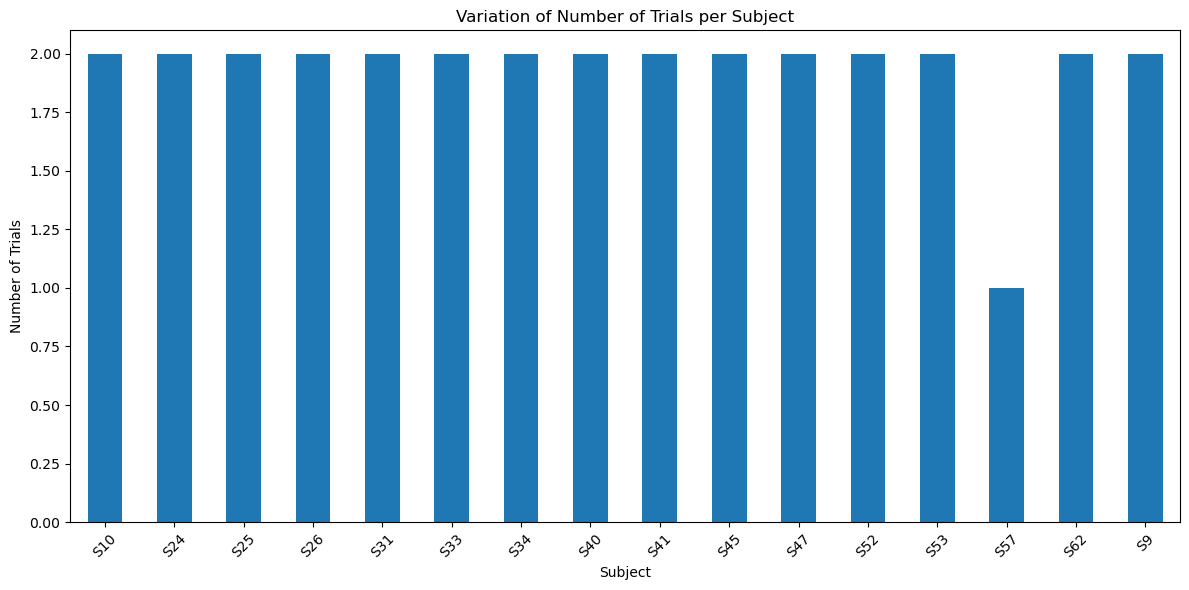

In [140]:
trials_per_subject = cpt_norm_f.groupby("subject")['trial'].nunique()

plt.figure(figsize=(12, 6))
trials_per_subject.plot(kind='bar')
plt.xlabel("Subject")
plt.ylabel("Number of Trials")
plt.title("Variation of Number of Trials per Subject")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [176]:
cpt_norm_f = cpt_norm_f[cpt_norm_f['subject'] != 'S57']

In [147]:
cpt_norm_f.subject.unique()

array(['S10', 'S24', 'S25', 'S26', 'S31', 'S33', 'S34', 'S40', 'S41',
       'S45', 'S47', 'S52', 'S53', 'S62', 'S9'], dtype=object)

In [167]:
cpt_norm_f.loc[f_cpt_df_f['trial'] == 1, 'label'] = 0
cpt_norm_f.loc[f_cpt_df_f['trial'] != 1, 'label'] = 1


## Label distribution

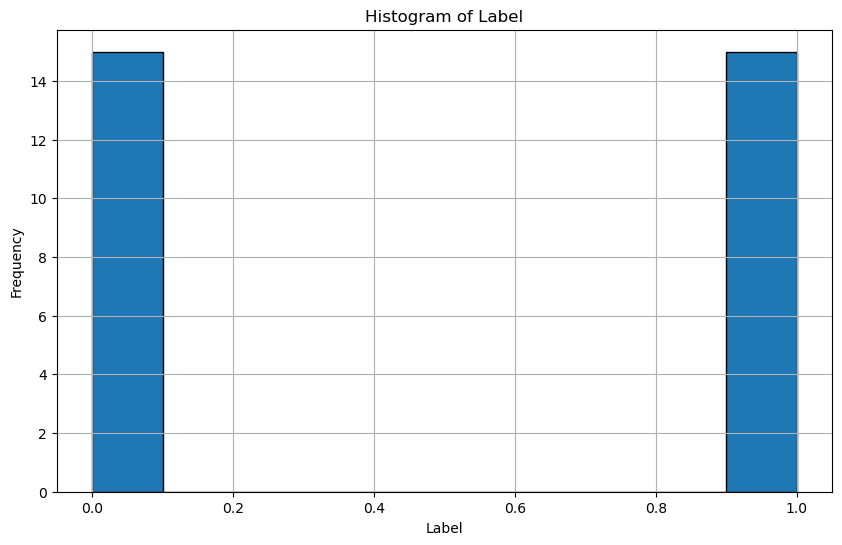

In [145]:
# Plot a histogram of the 'label' column
plt.figure(figsize=(10, 6))
plt.hist(cpt_norm_f["label"], bins=10, edgecolor='black')
plt.title("Histogram of Label")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Correlation

In [196]:
cpt_norm_f.columns

Index(['ID', 'trial', 'Temps Experience', 'Temps total Inactivite',
       'Temps total Activite', 'Temps total de Manipulation',
       'Nbr Total de Manipulation', 'Temps Total Consultation Instruction',
       'Nb Total de Consultation', 'Nombre erreur', 'Proposition_Phase',
       'subject', 'label'],
      dtype='object')

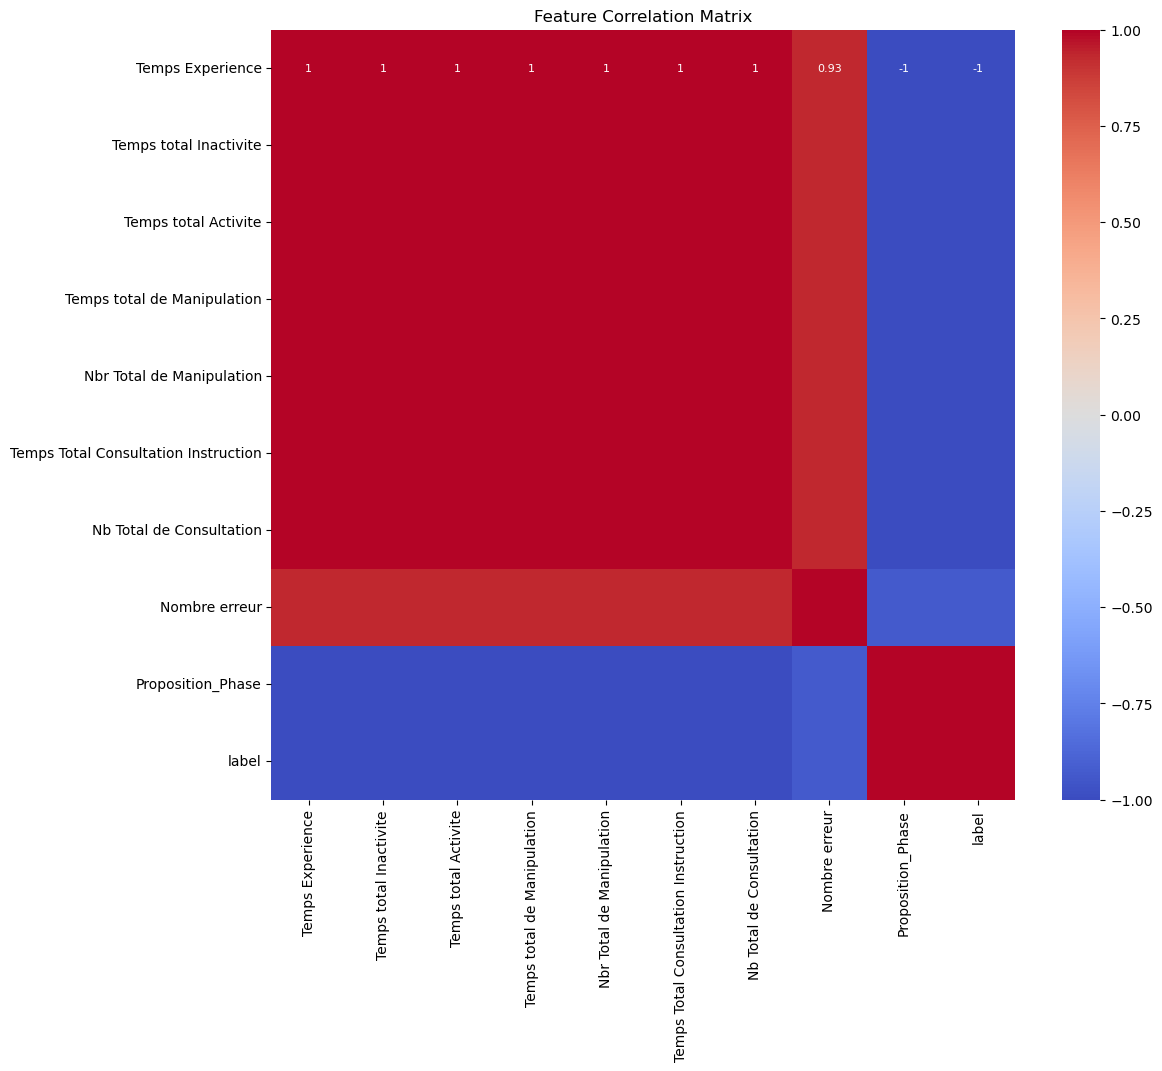

In [200]:
corr_matrix = cpt_norm_f.drop(labels=['ID', 'trial', 'subject'], axis=1).corr()

# Plot heatmap with adjustments
plt.figure(figsize=(12, 10))  # Increase figure size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})  # Smaller font size for annotations
plt.title('Feature Correlation Matrix')
plt.show()

## Dummy classifier 

In [226]:
cpt_df_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 388
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    120 non-null    object 
 1   trial                                 120 non-null    int64  
 2   Temps Experience                      120 non-null    float64
 3   Temps total Inactivite                120 non-null    float64
 4   Temps total Activite                  120 non-null    float64
 5   Temps total de Manipulation           120 non-null    float64
 6   Nbr Total de Manipulation             120 non-null    int64  
 7   Temps Total Consultation Instruction  120 non-null    float64
 8   Nb Total de Consultation              120 non-null    int64  
 9   Nombre erreur                         120 non-null    int64  
 10  Proposition_Phase                     120 non-null    int64  
 11  subject                 

In [148]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score

# Define the DummyClassifier
dummy_model = DummyClassifier(strategy="most_frequent")

logo = LeaveOneGroupOut()

subject_grps = cpt_norm_f.subject.unique()
X = cpt_norm_f.drop(columns=['ID', 'trial', 'subject', 'Proposition_Phase', 'label'])
y = cpt_norm_f.label  

dummy_accuracies_lst = []
dummy_cm_lst = []
dummy_vote_accuracies_lst = []
dummy_vote_cm_lst = []

counter = 1


print(f"- Start the training process")
all_subjects = cpt_norm_f.subject.unique() 
accuracies_lst = []
f1_scores_lst = []
recall_score_lst = []
#loop over all conditions
for idx, subject_ID in enumerate(all_subjects):
    x_train = cpt_norm_f.loc[cpt_norm_f['subject'] != subject_ID].drop(['ID', 'trial', 'subject', 'Proposition_Phase', 'label'], axis=1)
    x_test = cpt_norm_f.loc[cpt_norm_f['subject'] == subject_ID].drop(['ID', 'trial', 'subject', 'Proposition_Phase', 'label'], axis=1)
    y_train = cpt_norm_f.loc[cpt_norm_f['subject'] != subject_ID]['label']
    y_test = cpt_norm_f.loc[cpt_norm_f['subject'] == subject_ID]['label']
    
    dummy_model.fit(X=x_train, y=y_train)
    
    y_pred = dummy_model.predict(x_test)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    
    print(f"fold : {idx}, subject : {subject_ID}, accuracy : {accuracy}")
    
    cm = confusion_matrix(y_test, y_pred)
    dummy_accuracies_lst.append(accuracy)
    dummy_cm_lst.append(cm)
    
    
mean_accuracy = np.array(dummy_accuracies_lst).mean()
vote_mean_accuracy = np.array(dummy_vote_accuracies_lst).mean()

- Start the training process
fold : 0, subject : S10, accuracy : 0.5
fold : 1, subject : S24, accuracy : 0.5
fold : 2, subject : S25, accuracy : 0.5
fold : 3, subject : S26, accuracy : 0.5
fold : 4, subject : S31, accuracy : 0.5
fold : 5, subject : S33, accuracy : 0.5
fold : 6, subject : S34, accuracy : 0.5
fold : 7, subject : S40, accuracy : 0.5
fold : 8, subject : S41, accuracy : 0.5
fold : 9, subject : S45, accuracy : 0.5
fold : 10, subject : S47, accuracy : 0.5
fold : 11, subject : S52, accuracy : 0.5
fold : 12, subject : S53, accuracy : 0.5
fold : 13, subject : S62, accuracy : 0.5
fold : 14, subject : S9, accuracy : 0.5


C:\Users\wannatry\AppData\Local\Temp\ipykernel_23228\2214740520.py:48: RuntimeWarning: Mean of empty slice.
  vote_mean_accuracy = np.array(dummy_vote_accuracies_lst).mean()
C:\Users\wannatry\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [47]:
mean_accuracy

0.5

## SVM

In [96]:
cpt_df.columns

Index(['ID', 'trial', 'Temps Experience', 'Temps total Inactivite',
       'Temps total Activite', 'Temps total de Manipulation',
       'Nbr Total de Manipulation', 'Temps Total Consultation Instruction',
       'Nb Total de Consultation', 'Nombre erreur', 'Proposition_Phase',
       'subject'],
      dtype='object')

In [205]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.inspection import permutation_importance

class_weight = {0:1, 1:1}

# svm_model = SVC(kernel='rbf', class_weight=class_weight, probability=True)
svm_model = SVC(kernel='rbf')

X = cpt_norm_f.drop(columns=['ID', 'trial', 'subject', 'Proposition_Phase'])
y = cpt_norm_f.label 

all_subjects = cpt_norm_f.subject.unique() 
svm_accuracies_lst = []
svm_cm_lst = []
svm_vote_accuracies_lst = []
svm_vote_cm_lst = []

features = ['Temps Experience', 'Temps total Inactivite',
       'Temps total Activite', 'Temps total de Manipulation',
       'Nbr Total de Manipulation', 'Temps Total Consultation Instruction',
       'Nb Total de Consultation', 'Nombre erreur']

features = np.array(features)

perm_importance_lst = []


for idx, subject_ID in enumerate(all_subjects):
    
    x_train = cpt_norm_f.loc[cpt_norm_f['subject'] != subject_ID].drop(['ID', 'subject','trial', 
                                                                        # 'Temps Experience', 'Temps total Inactivite', 'Temps total Activite', 'Nbr Total de Manipulation',
                                                                        # 'Temps total de Manipulation', 'Temps Total Consultation Instruction', 
                                                                        # 'Nb Total de Consultation', 
                                                                        'Proposition_Phase', 'label'], axis=1)
    x_test = cpt_norm_f.loc[cpt_norm_f['subject'] == subject_ID].drop(['ID', 'subject','trial', 
                                                                        # 'Temps Experience', 'Temps total Inactivite', 'Temps total Activite', 'Nbr Total de Manipulation',
                                                                        # 'Temps total de Manipulation', 'Temps Total Consultation Instruction', 
                                                                        # 'Nb Total de Consultation', 
                                                                        'Proposition_Phase', 'label'], axis=1)
    y_train = cpt_norm_f.loc[cpt_norm_f['subject'] != subject_ID]['label']
    y_test = cpt_norm_f.loc[cpt_norm_f['subject'] == subject_ID]['label']   
    
     
    
    svm_model.fit(X=x_train, y=y_train)
    
    y_pred = svm_model.predict(x_test)
    
    perm_importance = permutation_importance(svm_model, x_test, y_test)
        
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"fold : {idx}, subject : {subject_ID}, accuracy : {accuracy}")
    
    
    svm_accuracies_lst.append(accuracy)
    svm_cm_lst.append(cm)
    perm_importance_lst.append(perm_importance)
    # sorted_idx = perm_importance.importances_mean.argsort()
    # plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
    # plt.xlabel("Permutation Importance")
    
    
    
        
    
mean_accuracy = np.array(svm_accuracies_lst).mean()
vote_mean_accuracy = np.array(svm_vote_accuracies_lst).mean()

fold : 0, subject : S10, accuracy : 1.0
fold : 1, subject : S24, accuracy : 1.0
fold : 2, subject : S25, accuracy : 1.0
fold : 3, subject : S26, accuracy : 1.0
fold : 4, subject : S31, accuracy : 1.0
fold : 5, subject : S33, accuracy : 1.0
fold : 6, subject : S34, accuracy : 1.0
fold : 7, subject : S40, accuracy : 1.0
fold : 8, subject : S41, accuracy : 1.0
fold : 9, subject : S45, accuracy : 1.0
fold : 10, subject : S47, accuracy : 1.0
fold : 11, subject : S52, accuracy : 1.0
fold : 12, subject : S53, accuracy : 1.0
fold : 13, subject : S62, accuracy : 1.0
fold : 14, subject : S9, accuracy : 1.0


C:\Users\wannatry\AppData\Local\Temp\ipykernel_23228\2264132464.py:67: RuntimeWarning: Mean of empty slice.
  vote_mean_accuracy = np.array(svm_vote_accuracies_lst).mean()
C:\Users\wannatry\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [204]:
mean_accuracy

0.9333333333333333

In [160]:
cpt_df.head(30)

,ID,Essai,Temps Experience,Temps total Inactivite,Temps total Activite,Temps total de Manipulation,Nbr Total de Manipulation,Temps Total Consultation Instruction,Nb Total de Consultation,Nombre erreur,Proposition_Phase,subject
0,ID10,1,96.099953,55.673687,40.426266,22.837461,23,17.588800,24,5,1,S10
1,ID10,2,54.533314,31.585220,22.948090,22.248150,21,0.699940,2,1,2,S10
2,ID10,3,41.166672,24.883051,16.283621,16.283621,15,0.000000,0,0,2,S10
3,ID10,4,42.422218,22.697981,19.724239,19.724239,19,0.000000,0,0,3,S10
4,ID10,5,33.722225,18.840277,14.881948,14.881948,17,0.000000,0,0,3,S10
5,ID12,1,209.733292,93.808098,115.925201,45.847500,23,70.077705,51,12,1,S12
6,ID12,2,90.100006,59.146221,30.953791,30.953791,16,0.000000,0,5,2,S12
7,ID12,3,57.322231,27.547091,29.775141,29.775141,14,0.000000,0,0,2,S12
8,ID12,4,53.033329,27.599150,25.434179,25.434179,15,0.000000,0,0,3,S12
9,ID12,5,39.566673,23.284307,16.282360,16.282360,11,0.000000,0,0,3,S12


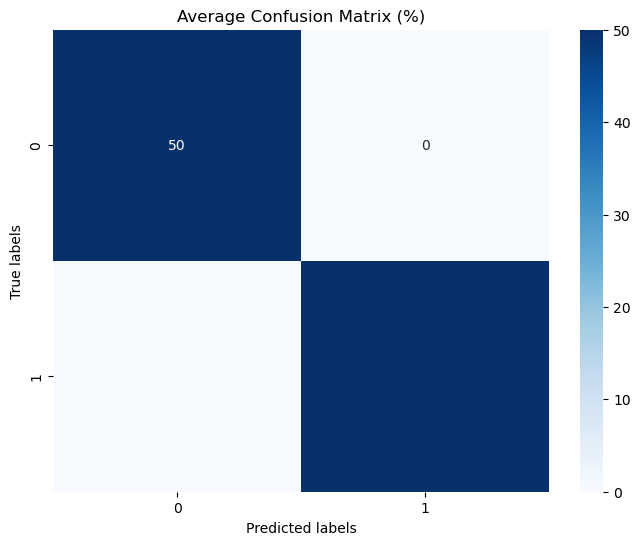

In [52]:
def compute_average_confusion_matrix(confusion_matrices):
    base_shape = confusion_matrices[0].shape
    filtered_matrices = [cm for cm in confusion_matrices if cm.shape == base_shape]

    sum_matrix = np.sum(filtered_matrices, axis=0)
    
    avg_matrix = sum_matrix / np.sum(np.sum(sum_matrix,axis=0), axis=0)
    
    return avg_matrix

def convert_to_percentage(matrix):
    percentage_matrix = matrix * 100
    return percentage_matrix

average_confusion_matrix = compute_average_confusion_matrix(svm_cm_lst)
average_confusion_matrix = convert_to_percentage(average_confusion_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(average_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar = True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Average Confusion Matrix (%)')
plt.show()

In [53]:
average_confusion_matrix

array([[50.,  0.],
       [ 0., 50.]])

In [340]:
svm_model.predict_proba(x_test)

array([[9.99248220e-01, 7.51780338e-04],
       [1.93776394e-02, 9.80622361e-01]])

# Binary classification (Physiological and Cpt data)

## Utils

In [3]:
def non_overlapping_rolling_stats(data, window_size, signal_name, sampling_rate):
    
    peak_freq_signals = ['EMG', 'BVP']
    slope_signals = ["TEMP"]
    
    mean_vals = []
    std_vals = []
    min_vals = []
    max_vals = []
    trial_lst = []
    subject_lst = []
    peak_freqs = []
    slopes = []
    
    nbr_skipped_seg = 0
    
    for subject in data.subject.unique() : 
        for trial in data[data['subject'] == subject].trial.unique() : 
            data_ = data[(data['subject'] == subject) & (data['trial'] == trial)]
            
    
            for start in range(0, len(data_), window_size):
                window_data = data_[start:start + window_size][signal_name]
                if len(window_data) == window_size:
                    if data_[start:start + window_size].trial.unique().shape[0] > 1 : 
                        print(f'more than one trial: {data_[start:start + window_size].trial.unique()}')
                    trial_lst.append(trial)
                    subject_lst.append(subject)
                    # mean_vals.append(np.round(window_data.mean(), 2))
                    # std_vals.append(np.round(window_data.std(), 2))
                    # min_vals.append(np.round(window_data.min(), 2))
                    # max_vals.append(np.round(window_data.max(), 2))
                    
                    mean_vals.append(window_data.mean())
                    std_vals.append(window_data.std())
                    min_vals.append(window_data.min())
                    max_vals.append(window_data.max())
                    
                    if signal_name in peak_freq_signals : 
                        # FFT to calculate peak frequency
                        yf = fft(window_data.values)
                        xf = fftfreq(window_size, 1 / sampling_rate)
                        peak_freq = xf[np.argmax(np.abs(yf))]
                        peak_freqs.append(peak_freq)
                        
                    if signal_name in slope_signals : 
                        x = np.arange(window_size)
                        y = window_data
                        p = np.polyfit(x, y, 1)
                        slopes.append(p[0])
                else : 
                    nbr_skipped_seg += 1 
                    # print(f'skipped segment, signal : {signal_name}')
    
    
    if signal_name in peak_freq_signals : 
        result = pd.DataFrame({
        'subject' : subject_lst, 
        f'{signal_name}mean': mean_vals,
        f'{signal_name}std': std_vals,
        f'{signal_name}min': min_vals,
        f'{signal_name}max': max_vals, 
        f'{signal_name}peak_freq': peak_freqs, 
        f'trial' : trial_lst
        })
    elif signal_name in slope_signals : 
        result = pd.DataFrame({
        'subject' : subject_lst, 
        f'{signal_name}mean': mean_vals,
        f'{signal_name}std': std_vals,
        f'{signal_name}min': min_vals,
        f'{signal_name}max': max_vals, 
        f'{signal_name}slope': slopes, 
        f'trial' : trial_lst
        })
    else : 
        result = pd.DataFrame({
        'subject' : subject_lst, 
        f'{signal_name}mean': mean_vals,
        f'{signal_name}std': std_vals,
        f'{signal_name}min': min_vals,
        f'{signal_name}max': max_vals, 
        f'trial' : trial_lst
    })
    return result, nbr_skipped_seg

## Physio signals

### Load data

In [348]:

bvp_df = pd.read_csv("./src/notebooks/data/f_bvp_df.csv", sep=';')
acc_df = pd.read_csv("./src/notebooks/data/f_acc_df.csv", sep=';')
temp_df = pd.read_csv("./src/notebooks/data/f_temp_df.csv", sep=';')
eda_df = pd.read_csv("./src/notebooks/data/f_eda_df.csv", sep=';')
eda_comps = pd.read_csv("./src/notebooks/data/eda_comps.csv", sep=';')

In [350]:
acc_df['magnitude'] = np.sqrt(acc_df['x_axis']**2 + acc_df['y_axis']**2 + acc_df['z_axis']**2)


In [343]:
# Decompose the eda signal into its underlying components

res = {
    'subject' : [],
    'trial' : [] , 
    'phasic' : [], 
    'tonic' : [], 
}

subjects_lst = eda_df.subject.unique() 
print(f'subjects_lst  : {subjects_lst}')
for subject in subjects_lst : 
    for trial in eda_df[eda_df['subject'] == subject].trial.unique() : 
        data = eda_df[(eda_df['subject'] == subject) & (eda_df['trial'] == trial)]
        # data = eda_df[eda_df['subject'] == subject]
        eda_comps = nk.eda_phasic(nk.standardize(data.EDA), sampling_rate=4)
        for phasic in eda_comps.EDA_Phasic.values : 
            res['phasic'].append(phasic)
            
        for smna in eda_comps.EDA_Tonic.values : 
            res['tonic'].append(smna)
            
        for _ in range(0, len(eda_comps.EDA_Phasic.values)) : 
            res['subject'].append(subject)
            res['trial'].append(trial)


eda_comps_df = pd.DataFrame(res) 

subjects_lst  : ['S10' 'S14' 'S16' 'S18' 'S22' 'S24' 'S25' 'S26' 'S31' 'S32' 'S33' 'S34'
 'S37' 'S39' 'S40' 'S41' 'S42' 'S45' 'S46' 'S47' 'S52' 'S53' 'S56' 'S57'
 'S62' 'S64' 'S65' 'S67' 'S68' 'S70' 'S71' 'S9']


NameError: name 'nk' is not defined

In [ ]:
phasic_df = eda_comps_df[['subject', 'trial', 'phasic']]
tonic_df = eda_comps_df[['subject', 'trial', 'tonic']]

In [351]:
phasic_df = eda_comps[['subject', 'trial', 'phasic']]
tonic_df = eda_comps[['subject', 'trial','tonic']]
smna_df = eda_comps[['subject', 'trial', 'smna']]

In [352]:
bvp_df.columns = ['subject', 'trial', 'BVP']

## Load Cpt Data

In [ ]:
cpt_df = pd.read_excel("./src/notebooks/data/Cpt_data.xlsx")

### Data Preparation

In [354]:
def get_first_last_trial(signal_df) : 

    signal_lst = []

    for subject in signal_df.subject.unique() : 
        print(f'subject : {subject}') 
        trials = signal_df[signal_df['subject'] == subject]['trial'].unique()
        print(f'trials : {trials}')
        first_trial = trials[0]
        last_trial = trials[trials.shape[0] - 1]
        print(f'first_trial : {first_trial}, last_trial: {last_trial}')
        filtered = signal_df[(signal_df['subject'] == subject) & ((signal_df['trial'] == first_trial) | (signal_df['trial'] == last_trial))]
        print(f'signal: {filtered.columns[2]} subject : {filtered.subject.unique()}, trials : {filtered.trial.unique()}')
        signal_lst.append(filtered)
        
    filtered_df = pd.DataFrame() 

    for df in signal_lst : 
        print(f'df_subject : {df.subject.unique()} df_trial : {df.trial.unique()}')
        filtered_df = pd.concat([filtered_df, df]) 
          
        
    print(f"signal: {signal_df.columns[2]} subject : S10, filtered : {filtered_df[filtered_df['subject'] == 'S10'].trial.unique()}")
    return filtered_df

In [ ]:

eda_df['trial'] = eda_df['trial'].str.replace('trial', '').astype(int)
phasic_df['trial'] = phasic_df['trial'].str.replace('trial', '').astype(int)
tonic_df['trial'] = tonic_df['trial'].str.replace('trial', '').astype(int)
smna_df['trial'] = smna_df['trial'].str.replace('trial', '').astype(int)
bvp_df['trial'] = bvp_df['trial'].str.replace('trial', '').astype(int)
acc_df['trial'] = acc_df['trial'].str.replace('trial', '').astype(int)
temp_df['trial'] = temp_df['trial'].str.replace('trial', '').astype(int)


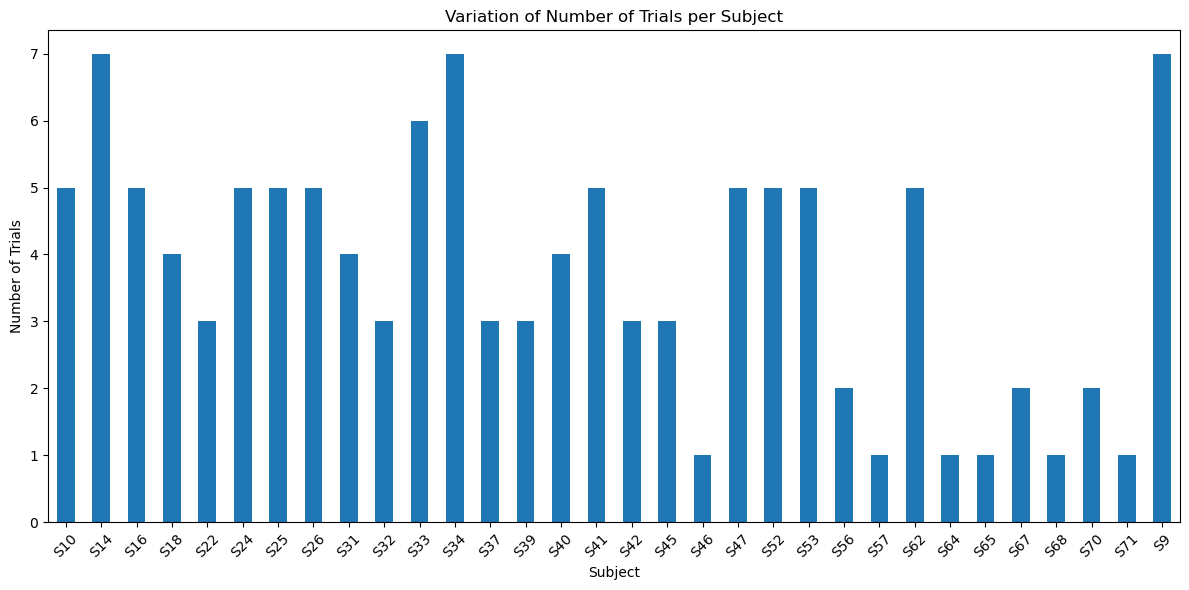

In [356]:
trials_per_subject = eda_df.groupby("subject")['trial'].nunique()

plt.figure(figsize=(12, 6))
trials_per_subject.plot(kind='bar')
plt.xlabel("Subject")
plt.ylabel("Number of Trials")
plt.title("Variation of Number of Trials per Subject")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [358]:
nbr_subject = 0 # Number of subject that do not have trial one. 
lst_subjects = []
for subject in eda_df.subject.unique() : 
    if ( 1 in eda_df[eda_df['subject'] == subject].trial.unique() ) == False : 
        print(f"subject {subject} does not have the first trial")
        print(f"{subject} trials {eda_df[eda_df['subject'] == subject].trial.unique()}")
        nbr_subject += 1 
        lst_subjects.append(subject)
        

print(f'------------------------------------------------------------')   
print(f'Proportion of subjects without trial one signals : {(nbr_subject / eda_df.subject.unique().shape[0]) * 100}%')     
print(f'Number of subjects without trial one signals : {nbr_subject}')
print(f'List of subjects without trial one signals : {lst_subjects}')

subject S14 does not have the first trial
S14 trials [2 3 4 5 6 8 9]
subject S16 does not have the first trial
S16 trials [5 6 7 8 9]
subject S18 does not have the first trial
S18 trials [2 3 4 6]
subject S22 does not have the first trial
S22 trials [6 8 9]
subject S32 does not have the first trial
S32 trials [2 4 6]
subject S37 does not have the first trial
S37 trials [4 6 9]
subject S39 does not have the first trial
S39 trials [4 5 6]
subject S42 does not have the first trial
S42 trials [3 5 6]
subject S46 does not have the first trial
S46 trials [5]
subject S56 does not have the first trial
S56 trials [6 7]
subject S64 does not have the first trial
S64 trials [2]
subject S65 does not have the first trial
S65 trials [7]
subject S67 does not have the first trial
S67 trials [5 6]
subject S68 does not have the first trial
S68 trials [5]
subject S70 does not have the first trial
S70 trials [5 6]
subject S71 does not have the first trial
S71 trials [5]
------------------------------------

In [360]:
keep_subject_lst = []
for subject in eda_df.subject.unique() : 
    if ( 1 in eda_df[eda_df['subject'] == subject].trial.unique() ) == True : 
        print(f"subject {subject} have the first trial")
        print(f"{subject} trials {eda_df[eda_df['subject'] == subject].trial.unique()}")
        keep_subject_lst.append(subject)
        
        
print(f'----------------------------------------------------------')
print(f'subjects with the signals of the first trial : {keep_subject_lst}')

subject S10 have the first trial
S10 trials [1 2 3 4 5]
subject S24 have the first trial
S24 trials [1 2 5 7 8]
subject S25 have the first trial
S25 trials [1 2 3 4 5]
subject S26 have the first trial
S26 trials [1 2 3 4 6]
subject S31 have the first trial
S31 trials [1 4 5 6]
subject S33 have the first trial
S33 trials [1 2 3 4 5 6]
subject S34 have the first trial
S34 trials [1 3 4 5 6 7 8]
subject S40 have the first trial
S40 trials [1 3 4 6]
subject S41 have the first trial
S41 trials [1 2 3 4 5]
subject S45 have the first trial
S45 trials [1 2 5]
subject S47 have the first trial
S47 trials [1 2 3 4 7]
subject S52 have the first trial
S52 trials [1 3 4 5 6]
subject S53 have the first trial
S53 trials [1 3 4 6 7]
subject S57 have the first trial
S57 trials [1]
subject S62 have the first trial
S62 trials [1 2 3 4 5]
subject S9 have the first trial
S9 trials [1 2 3 4 5 6 7]
----------------------------------------------------------
subjects with the signals of the first trial : ['S10'

In [464]:
# Keep only the subjects with the fist trial signals 

eda_df_f = eda_df[eda_df['subject'].isin(keep_subject_lst)]
phasic_df_f = phasic_df[phasic_df['subject'].isin(keep_subject_lst)]
tonic_df_f = tonic_df[tonic_df['subject'].isin(keep_subject_lst)]
smna_df_f = smna_df[smna_df['subject'].isin(keep_subject_lst)]
bvp_df_f = bvp_df[bvp_df['subject'].isin(keep_subject_lst)]
acc_df_f = acc_df[acc_df['subject'].isin(keep_subject_lst)]
temp_df_f = temp_df[temp_df['subject'].isin(keep_subject_lst)]
cpt_df_f = cpt_df[cpt_df['subject'].isin(keep_subject_lst)]

In [468]:
cpt_df_f

,ID,trial,Temps Experience,Temps total Inactivite,Temps total Activite,Temps total de Manipulation,Nbr Total de Manipulation,Temps Total Consultation Instruction,Nb Total de Consultation,Nombre erreur,Proposition_Phase,subject
0,ID10,1,96.099953,55.673687,40.426266,22.837461,23,17.58880,24,5,1,S10
1,ID10,2,54.533314,31.585220,22.948090,22.248150,21,0.69994,2,1,2,S10
2,ID10,3,41.166672,24.883051,16.283621,16.283621,15,0.00000,0,0,2,S10
3,ID10,4,42.422218,22.697981,19.724239,19.724239,19,0.00000,0,0,3,S10
4,ID10,5,33.722225,18.840277,14.881948,14.881948,17,0.00000,0,0,3,S10
...,...,...,...,...,...,...,...,...,...,...,...,...
384,ID9,3,53.544449,25.779648,27.764799,25.764799,14,2.00000,3,0,2,S9
385,ID9,4,48.744450,23.301680,25.442772,24.987211,15,0.45556,1,0,2,S9
386,ID9,5,43.344448,20.241940,23.102510,23.102510,14,0.00000,0,0,2,S9
387,ID9,6,40.733341,21.255289,19.478050,19.478050,14,0.00000,0,0,3,S9


In [467]:
cpt_df_f.columns

Index(['ID', 'trial', 'Temps Experience', 'Temps total Inactivite',
       'Temps total Activite', 'Temps total de Manipulation',
       'Nbr Total de Manipulation', 'Temps Total Consultation Instruction',
       'Nb Total de Consultation', 'Nombre erreur', 'Proposition_Phase',
       'subject'],
      dtype='object')

In [469]:
# Create a dictionary of subjects with their 
# corrisponding signals from the first and last trial

signals = [eda_df_f, phasic_df_f, tonic_df_f, 
            smna_df_f, phasic_df_f, tonic_df_f,
            bvp_df_f, temp_df_f, acc_df_f, cpt_df_f]
data_f = {}

for signal in signals : 
    data_f[signal.columns[2]] = get_first_last_trial(signal)

subject : S10
trials : [1 2 3 4 5]
first_trial : 1, last_trial: 5
signal: EDA subject : ['S10'], trials : [1 5]
subject : S24
trials : [1 2 5 7 8]
first_trial : 1, last_trial: 8
signal: EDA subject : ['S24'], trials : [1 8]
subject : S25
trials : [1 2 3 4 5]
first_trial : 1, last_trial: 5
signal: EDA subject : ['S25'], trials : [1 5]
subject : S26
trials : [1 2 3 4 6]
first_trial : 1, last_trial: 6
signal: EDA subject : ['S26'], trials : [1 6]
subject : S31
trials : [1 4 5 6]
first_trial : 1, last_trial: 6
signal: EDA subject : ['S31'], trials : [1 6]
subject : S33
trials : [1 2 3 4 5 6]
first_trial : 1, last_trial: 6
signal: EDA subject : ['S33'], trials : [1 6]
subject : S34
trials : [1 3 4 5 6 7 8]
first_trial : 1, last_trial: 8
signal: EDA subject : ['S34'], trials : [1 8]
subject : S40
trials : [1 3 4 6]
first_trial : 1, last_trial: 6
signal: EDA subject : ['S40'], trials : [1 6]
subject : S41
trials : [1 2 3 4 5]
first_trial : 1, last_trial: 5
signal: EDA subject : ['S41'], trial

In [476]:
type(data_f)

dict

In [483]:
data_f['cpt_data'] = data_f.pop('Temps Experience')

In [485]:
cpt_columns = ['ID', 'trial', 'Temps Experience', 'Temps total Inactivite',
       'Temps total Activite', 'Temps total de Manipulation',
       'Nbr Total de Manipulation', 'Temps Total Consultation Instruction',
       'Nb Total de Consultation', 'Nombre erreur', 'Proposition_Phase',
       'subject']

eda_df_f = data_f['EDA']
phasic_df_f = data_f['phasic']
tonic_df_f = data_f['tonic']
smna_df_f = data_f['smna']
bvp_df_f = data_f['BVP']
temp_df_f = data_f['TEMP']
acc_df_f = data_f['x_axis']
cpt_df_f = data_f['cpt_data']

In [484]:
data_f.keys()

dict_keys(['EDA', 'phasic', 'tonic', 'smna', 'BVP', 'TEMP', 'x_axis', 'cpt_data'])

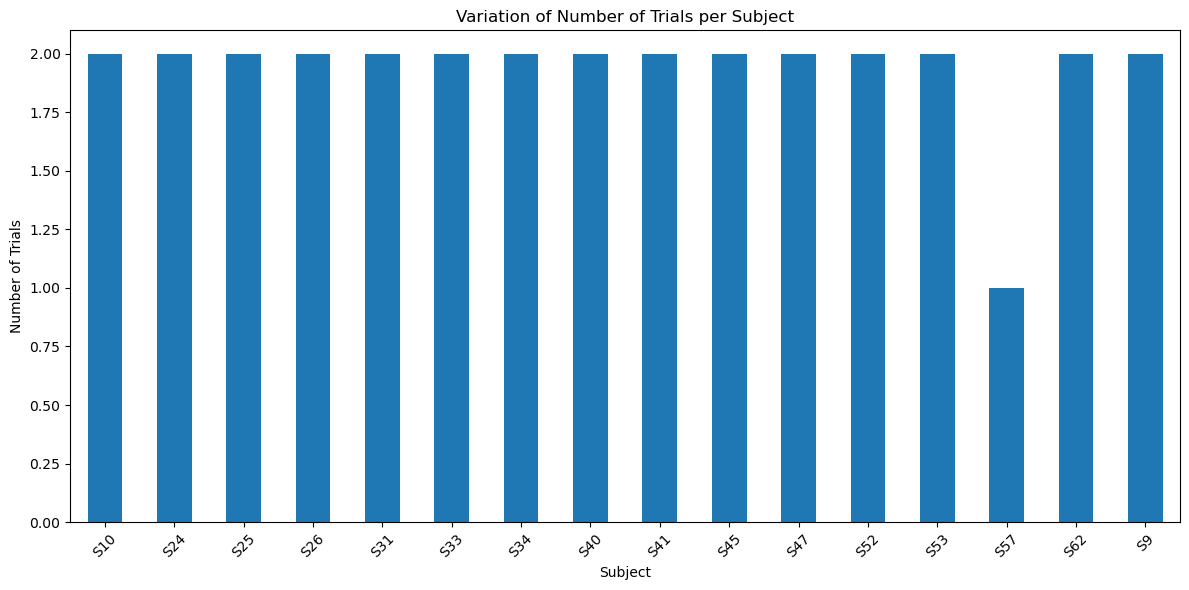

In [365]:
trials_per_subject = eda_df_f.groupby("subject")['trial'].nunique()

plt.figure(figsize=(12, 6))
trials_per_subject.plot(kind='bar')
plt.xlabel("Subject")
plt.ylabel("Number of Trials")
plt.title("Variation of Number of Trials per Subject")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [487]:
# Remove the subject that has only one trial

eda_df_f = eda_df_f[eda_df_f['subject'] != 'S57']
phasic_df_f = phasic_df_f[phasic_df_f['subject'] != 'S57']
tonic_df_f = tonic_df_f[tonic_df_f['subject'] != 'S57']
smna_df_f = smna_df_f[smna_df_f['subject'] != 'S57']
bvp_df_f = bvp_df_f[bvp_df_f['subject'] != 'S57']
acc_df_f = acc_df_f[acc_df_f['subject'] != 'S57']
temp_df_f = temp_df_f[temp_df_f['subject'] != 'S57']
cpt_df_f = cpt_df_f[cpt_df_f['subject'] != 'S57']

In [368]:
# Trial total duration in seconds
# Illustrate the class imbalance 

print(f"Trial 1 time duration in seconds : {eda_df_f[eda_df_f['trial'] == 1]['trial'].count() / 4}s")
print(f"Last trial time duration in seconds : {eda_df_f[eda_df_f['trial'] != 1]['trial'].count() / 4}s")

Trial 1 time duration in seconds : 3013.0s
Last trial time duration in seconds : 635.0s


### Feature extraction

In [488]:
window_size = 4 * 1
sampling_rate = 4
eda_df_f_features, _ = non_overlapping_rolling_stats(eda_df_f, window_size=window_size, signal_name='EDA', sampling_rate=sampling_rate)
phasic_df_f_features, _ = non_overlapping_rolling_stats(phasic_df_f, window_size=window_size, signal_name='phasic', sampling_rate=sampling_rate)
tonic_df_f_features, _ = non_overlapping_rolling_stats(tonic_df_f, window_size=window_size, signal_name='tonic', sampling_rate=sampling_rate)
smna_df_f_features, _ = non_overlapping_rolling_stats(smna_df_f, window_size=window_size, signal_name='smna', sampling_rate=sampling_rate)
temp_df_f_features, _ = non_overlapping_rolling_stats(temp_df_f, window_size=window_size, signal_name='TEMP', sampling_rate=sampling_rate)

window_size = 32 * 1 
sampling_rate = 32
x_acc_df_f_features, _ = non_overlapping_rolling_stats(acc_df_f, window_size=window_size, signal_name='x_axis', sampling_rate=sampling_rate)
y_acc_df_f_features, _ = non_overlapping_rolling_stats(acc_df_f, window_size=window_size, signal_name='y_axis', sampling_rate=sampling_rate)
z_acc_df_f_features, _ = non_overlapping_rolling_stats(acc_df_f, window_size=window_size, signal_name='z_axis', sampling_rate=sampling_rate)
magnitude_acc_features, _ = non_overlapping_rolling_stats(acc_df_f, window_size=window_size, signal_name='magnitude', sampling_rate=sampling_rate)


window_size = 64 * 1
sampling_rate = 64
bvp_df_f_features, _ = non_overlapping_rolling_stats(bvp_df_f, window_size=window_size, signal_name='BVP', sampling_rate=sampling_rate)



In [490]:
features = pd.concat([eda_df_f_features, phasic_df_f_features, tonic_df_f_features, 
                     smna_df_f_features, phasic_df_f_features, tonic_df_f_features,
                      temp_df_f_features, x_acc_df_f_features, y_acc_df_f_features, z_acc_df_f_features, bvp_df_f_features], axis=1)

In [491]:
features = features.T.drop_duplicates().T

In [ ]:
##########################################################
# Check wether index exists as a column in the dataframe 
# before executing this cell
##########################################################
features = features.drop(columns= ['index'])
features

In [492]:
print(f"First trial time duration in seconds : {features[features['trial'] == 1]['trial'].count()}")
print(f"Last trial time duration in seconds : {features[features['trial'] != 1]['trial'].count()}")

First trial time duration in seconds : 3013
Last trial time duration in seconds : 635


In [493]:
features.loc[features['trial'] == 1, 'label'] = 0
features.loc[features['trial'] != 1, 'label'] = 1

In [494]:
print(f"First trial time duration in seconds : {features[features['label'] == 0]['trial'].count()}s")
print(f"Last trial time duration in seconds : {features[features['label'] == 1]['trial'].count()}s")

print(f'----------------------------------------------------------------------------------------------')

print(f"A difference of {features[features['label'] == 0]['trial'].count() - features[features['label'] == 1]['trial'].count()}s")

First trial time duration in seconds : 3013s
Last trial time duration in seconds : 635s
----------------------------------------------------------------------------------------------
A difference of 2378s


In [495]:
print(f"Imbalance ratio : {features[features['label'] == 1]['trial'].count() / (features[features['label'] == 0]['trial'].count() + features[features['label'] == 1]['trial'].count())}")

Imbalance ratio : 0.17406798245614036


In [496]:
labels = features.label
subjects = features.subject
trials = features.trial 

In [497]:
labels = labels.reset_index().drop(columns=['index']).label
subjects = subjects.reset_index().drop(columns=['index']).subject
trials = trials.reset_index().drop(columns=['index']).trial

In [498]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

pca = PCA(n_components=20, svd_solver='full')
pca_df = pca.fit_transform(features.drop(columns=['subject', 'trial', 'label']))
pca_df = pd.DataFrame(pca_df, columns=[f'PC{i}' for i in range(1, 21)])
# f_features = pca_df

transformer = QuantileTransformer()
transformed_data = transformer.fit_transform(pca_df)
transformed_data = pd.DataFrame(transformed_data)
transformed_data.columns = pca_df.columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = transformed_data.columns
scaled_data['label'] = labels
scaled_data['subject'] = subjects
scaled_data['trials'] = trials
scaled_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,label,subject,trials
0,0.133680,0.962013,1.624145,-1.656450,-0.429182,1.633653,-1.048894,-0.892460,0.043153,-1.674558,...,-1.705007,-0.150105,-1.239583,-0.182939,-1.376153,-1.673292,-1.711642,0.0,S10,1
1,0.008674,0.812128,1.611936,1.717249,1.066219,1.594288,1.727142,-0.470011,-1.696615,-1.447571,...,-1.600361,0.595582,-1.170095,1.692879,-1.522619,-1.240335,1.439789,0.0,S10,1
2,-0.757296,0.604709,1.345623,-1.683288,1.137226,1.101243,-1.181714,-0.965993,-0.532291,1.433346,...,1.522819,0.231327,-1.441500,0.526060,-1.683089,0.771697,1.194116,0.0,S10,1
3,0.386598,1.076373,1.703149,-1.714379,-0.813595,1.250290,1.683719,0.931669,1.509938,-0.178090,...,-1.337086,-0.074527,-0.950658,1.293800,0.040808,-0.100203,-1.547550,0.0,S10,1
4,0.359618,1.300076,1.697488,-0.881847,0.435275,1.099549,1.531430,0.331647,-0.875193,1.634560,...,-0.015650,0.258009,-1.434011,-1.347598,-0.386347,1.031678,-1.283949,0.0,S10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,1.468318,0.181279,-0.397741,-0.639135,0.095352,-0.448478,0.538981,0.291625,0.252733,-0.080843,...,0.300366,0.030073,0.133467,0.160894,0.820044,0.719409,-1.341759,1.0,S9,7
3644,1.644962,0.674577,0.950451,-1.298262,-0.517463,-1.603327,-1.261424,0.628937,-1.025982,-0.719387,...,-1.016323,-0.090091,0.129797,-0.158501,1.106164,-0.490500,0.565099,1.0,S9,7
3645,1.413830,0.567046,-0.823414,-1.606247,-1.024527,1.170566,0.873889,0.483647,1.470778,-1.396124,...,1.525740,-0.196108,0.821820,1.602196,1.677456,1.665988,-1.162767,1.0,S9,7
3646,1.707158,0.627011,1.250553,1.582734,-0.091852,1.418485,0.954981,0.205327,1.209155,-1.549358,...,-0.319812,0.831170,0.374083,1.617502,-0.162863,1.671452,-1.509594,1.0,S9,7


In [499]:
scaled_data.label = scaled_data.label.astype(int)
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC1      3648 non-null   float64
 1   PC2      3648 non-null   float64
 2   PC3      3648 non-null   float64
 3   PC4      3648 non-null   float64
 4   PC5      3648 non-null   float64
 5   PC6      3648 non-null   float64
 6   PC7      3648 non-null   float64
 7   PC8      3648 non-null   float64
 8   PC9      3648 non-null   float64
 9   PC10     3648 non-null   float64
 10  PC11     3648 non-null   float64
 11  PC12     3648 non-null   float64
 12  PC13     3648 non-null   float64
 13  PC14     3648 non-null   float64
 14  PC15     3648 non-null   float64
 15  PC16     3648 non-null   float64
 16  PC17     3648 non-null   float64
 17  PC18     3648 non-null   float64
 18  PC19     3648 non-null   float64
 19  PC20     3648 non-null   float64
 20  label    3648 non-null   int32  
 21  subject  3648 

## Dummy classifier

In [388]:
def evaluate_on_segment(scaled_data, model, subject_ID) : 
    
    
    x_train = scaled_data.loc[scaled_data['subject'] != subject_ID].drop(['subject', 'label', 'trials'], axis=1)
    x_test = scaled_data.loc[scaled_data['subject'] == subject_ID].drop(['subject', 'label', 'trials'], axis=1)
    y_train = scaled_data.loc[scaled_data['subject'] != subject_ID]['label']
    y_test = scaled_data.loc[scaled_data['subject'] == subject_ID]['label']
    
    model.fit(X=x_train, y=y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"fold : {idx}, subject : {subject_ID}, accuracy : {accuracy}")
    
    return (
        model, accuracy, cm
    )


def evaluate_on_trial(scaled_data, model, subject_ID) : 
    accuracies = []
    cms = []
    for label in scaled_data[(scaled_data['subject'] == subject_ID)].label.unique() : 
        subject_data = scaled_data[(scaled_data['subject'] == subject_ID) & (scaled_data['label'] == label)].drop(columns=['subject', 'label', 'trials'])
        y_pred = model.predict(subject_data) 
        predicted_label = np.argmax(np.bincount(y_pred))
        
        accuracy = accuracy_score([label], [predicted_label])
        cm = confusion_matrix([label], [predicted_label], labels=[0,1])
        print(f'subject : {subject_ID}, accuracy : {accuracy}')
        
        accuracies.append(accuracy)
        cms.append(cm)
        
    print(f'mean Evaluating on trial: [subject: {subject_ID}, accuracy : {np.array(accuracies).mean()}]')
    
    return (accuracies, cms) 
    

In [389]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score

# Define the DummyClassifier
dummy_model = DummyClassifier(strategy="most_frequent")

logo = LeaveOneGroupOut()

subject_grps = scaled_data.subject.unique()
X = scaled_data.drop(columns=['label', 'subject', 'trials'])
y = scaled_data.label 

dummy_accuracies_lst = []
dummy_cm_lst = []
dummy_vote_accuracies_lst = []
dummy_vote_cm_lst = []

counter = 1

print(f"- len subjects_id : {len(subject_grps)}")
print(f"- len X : {len(scaled_data)}")
print(f"- len y : {len(labels)}")


print(f"- Start the training process")
all_subjects = scaled_data.subject.unique() 
accuracies_lst = []
f1_scores_lst = []
recall_score_lst = []
#loop over all conditions
for idx, subject_ID in enumerate(all_subjects):
    
    dummy_model, accuracy, cm  = evaluate_on_segment(scaled_data=scaled_data, model=dummy_model, subject_ID=subject_ID) 
    dummy_accuracies_lst.append(accuracy)
    dummy_cm_lst.append(cm)
    
    trial_accuracy, trial_cm = evaluate_on_trial(scaled_data=scaled_data, 
                                                 model=dummy_model, 
                                                 subject_ID=subject_ID)

    dummy_vote_accuracies_lst.append(trial_accuracy[0])
    dummy_vote_accuracies_lst.append(trial_accuracy[1])
    dummy_vote_cm_lst.append(trial_cm[0])
    dummy_vote_cm_lst.append(trial_cm[1])
    
    
    
mean_accuracy = np.array(dummy_accuracies_lst).mean()
vote_mean_accuracy = np.array(dummy_vote_accuracies_lst).mean()



- len subjects_id : 15
- len X : 3648
- len y : 3648
- Start the training process
fold : 0, subject : S10, accuracy : 0.7384615384615385
subject : S10, accuracy : 1.0
subject : S10, accuracy : 0.0
mean Evaluating on trial: [subject: S10, accuracy : 0.5]
fold : 1, subject : S24, accuracy : 0.8898305084745762
subject : S24, accuracy : 1.0
subject : S24, accuracy : 0.0
mean Evaluating on trial: [subject: S24, accuracy : 0.5]
fold : 2, subject : S25, accuracy : 0.7777777777777778
subject : S25, accuracy : 1.0
subject : S25, accuracy : 0.0
mean Evaluating on trial: [subject: S25, accuracy : 0.5]
fold : 3, subject : S26, accuracy : 0.8730569948186528
subject : S26, accuracy : 1.0
subject : S26, accuracy : 0.0
mean Evaluating on trial: [subject: S26, accuracy : 0.5]
fold : 4, subject : S31, accuracy : 0.8054298642533937
subject : S31, accuracy : 1.0
subject : S31, accuracy : 0.0
mean Evaluating on trial: [subject: S31, accuracy : 0.5]
fold : 5, subject : S33, accuracy : 0.8043478260869565
sub

In [390]:
print(f'average acc : {mean_accuracy}')
print(f'vote_mean_accuracy  : {vote_mean_accuracy}')

average acc : 0.8108952713140033
vote_mean_accuracy  : 0.5


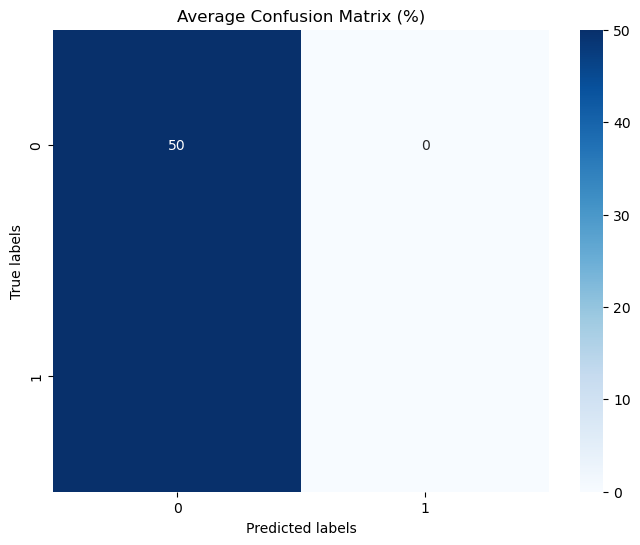

In [391]:
def compute_average_confusion_matrix(confusion_matrices):
    base_shape = confusion_matrices[0].shape
    filtered_matrices = [cm for cm in confusion_matrices if cm.shape == base_shape]

    sum_matrix = np.sum(filtered_matrices, axis=0)
    
    avg_matrix = sum_matrix / np.sum(np.sum(sum_matrix,axis=0), axis=0)
    
    return avg_matrix

def convert_to_percentage(matrix):
    percentage_matrix = matrix * 100
    return percentage_matrix

average_confusion_matrix = compute_average_confusion_matrix(dummy_vote_cm_lst)
average_confusion_matrix = convert_to_percentage(average_confusion_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(average_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar = True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Average Confusion Matrix (%)')
plt.show()

### SVM

In [392]:
from sklearn.svm import SVC

class_weight = {0:1, 1:1}

svm_model = SVC(kernel='rbf', class_weight=class_weight)

X = scaled_data.drop(columns=['label', 'subject', 'trials'])
y = scaled_data.label 

all_subjects = scaled_data.subject.unique() 
svm_accuracies_lst = []
svm_cm_lst = []
svm_vote_accuracies_lst = []
svm_vote_cm_lst = []


for idx, subject_ID in enumerate(all_subjects):
    
    svm_model, accuracy, cm  = evaluate_on_segment(scaled_data=scaled_data, model=svm_model, subject_ID=subject_ID) 
    svm_accuracies_lst.append(accuracy)
    svm_cm_lst.append(cm)
    
    trial_accuracy, trial_cm = evaluate_on_trial(scaled_data=scaled_data, 
                                                 model=svm_model, 
                                                 subject_ID=subject_ID)

    svm_vote_accuracies_lst.append(trial_accuracy[0])
    svm_vote_accuracies_lst.append(trial_accuracy[1])
    svm_vote_cm_lst.append(trial_cm[0])
    svm_vote_cm_lst.append(trial_cm[1])
    
    
    
mean_accuracy = np.array(svm_accuracies_lst).mean()
vote_mean_accuracy = np.array(svm_vote_accuracies_lst).mean()


fold : 0, subject : S10, accuracy : 0.7307692307692307
subject : S10, accuracy : 1.0
subject : S10, accuracy : 0.0
mean Evaluating on trial: [subject: S10, accuracy : 0.5]
fold : 1, subject : S24, accuracy : 0.8877118644067796
subject : S24, accuracy : 1.0
subject : S24, accuracy : 0.0
mean Evaluating on trial: [subject: S24, accuracy : 0.5]
fold : 2, subject : S25, accuracy : 0.7777777777777778
subject : S25, accuracy : 1.0
subject : S25, accuracy : 0.0
mean Evaluating on trial: [subject: S25, accuracy : 0.5]
fold : 3, subject : S26, accuracy : 0.9352331606217616
subject : S26, accuracy : 1.0
subject : S26, accuracy : 1.0
mean Evaluating on trial: [subject: S26, accuracy : 1.0]
fold : 4, subject : S31, accuracy : 0.7873303167420814
subject : S31, accuracy : 1.0
subject : S31, accuracy : 0.0
mean Evaluating on trial: [subject: S31, accuracy : 0.5]
fold : 5, subject : S33, accuracy : 0.8043478260869565
subject : S33, accuracy : 1.0
subject : S33, accuracy : 0.0
mean Evaluating on trial:

In [393]:
print(f'mean_accuracy : {mean_accuracy}')
print(f'vote_mean_accuracy : {vote_mean_accuracy}')

mean_accuracy : 0.786054122291633
vote_mean_accuracy : 0.5666666666666667


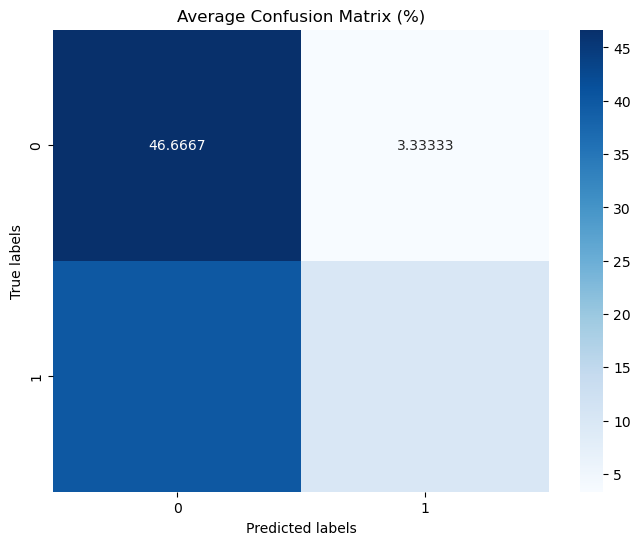

In [394]:
def compute_average_confusion_matrix(confusion_matrices):
    base_shape = confusion_matrices[0].shape
    filtered_matrices = [cm for cm in confusion_matrices if cm.shape == base_shape]

    sum_matrix = np.sum(filtered_matrices, axis=0)
    
    avg_matrix = sum_matrix / np.sum(np.sum(sum_matrix,axis=0), axis=0)
    
    return avg_matrix

def convert_to_percentage(matrix):
    percentage_matrix = matrix * 100
    return percentage_matrix

average_confusion_matrix = compute_average_confusion_matrix(svm_vote_cm_lst)
average_confusion_matrix = convert_to_percentage(average_confusion_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(average_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar = True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Average Confusion Matrix (%)')
plt.show()

# Combine Physio&Comportementale

In [426]:
cpt_df_f[cpt_df_f['ID'] == 'ID10']

,ID,trial,Temps Experience,Temps total Inactivite,Temps total Activite,Temps total de Manipulation,Nbr Total de Manipulation,Temps Total Consultation Instruction,Nb Total de Consultation,Nombre erreur,Proposition_Phase,subject,label
0,ID10,1,-0.295912,-0.094181,-0.434761,-0.411902,-0.029490,-0.386159,0.117337,-0.051699,1,S10,0.0
4,ID10,5,-0.729086,-0.693854,-0.736324,-0.617590,-0.408648,-0.711205,-0.746932,-0.488593,3,S10,1.0


In [434]:
scaled_data[(scaled_data['subject'] == 'S10') & (scaled_data['trials'] == 5)].label.unique()

array([1])

In [502]:
from sklearn.svm import SVC

class_weight = {0:1, 1:1}

svm_model = SVC(kernel='rbf', class_weight=class_weight, probability=True)
svm_model_ = SVC(kernel='rbf', class_weight=class_weight, probability=True)

X = scaled_data.drop(columns=['label', 'subject', 'trials'])
y = scaled_data.label 

all_subjects = scaled_data.subject.unique() 
svm_accuracies_lst = []
svm_cm_lst = []
svm_vote_accuracies_lst = []
svm_vote_cm_lst = []

accuracies_lst = []


for idx, subject_ID in enumerate(all_subjects):
    
    # Physio data 
    
    x_train = scaled_data.loc[scaled_data['subject'] != subject_ID].drop(['subject', 'label', 'trials'], axis=1)
    x_test = scaled_data.loc[scaled_data['subject'] == subject_ID].drop(['subject', 'label', 'trials'], axis=1)
    y_train = scaled_data.loc[scaled_data['subject'] != subject_ID]['label']
    y_test = scaled_data.loc[scaled_data['subject'] == subject_ID]['label']
    
    svm_model.fit(X=x_train, y=y_train)
    y_pred = svm_model.predict(x_test)
    predicted_proba = svm_model.predict_proba(x_test)
    
    
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    cm = confusion_matrix(y_test, y_pred)
    svm_accuracies_lst.append(accuracy)
    svm_cm_lst.append(cm)
    
    # Cpt Data
    
    x_train = cpt_df_f.loc[cpt_df_f['subject'] != subject_ID].drop(['ID', 'trial', 'subject', 'Proposition_Phase', 'label'], axis=1)
    # x_test = cpt_df_f.loc[cpt_df_f['subject'] == subject_ID].drop(['ID', 'trial', 'subject', 'Proposition_Phase', 'label'], axis=1)
    y_train = cpt_df_f.loc[cpt_df_f['subject'] != subject_ID]['label']
    # y_test = cpt_df_f.loc[cpt_df_f['subject'] == subject_ID]['label']
    
    svm_model_.fit(X=x_train, y=y_train)
    
    
    
    ## Evaluation on trial. 
    
    trial_cm = []
    proba_to_predict = np.array([0, 0])
    
    for label in scaled_data[(scaled_data['subject'] == subject_ID)].label.unique() : 
        
        subject_data = scaled_data[(scaled_data['subject'] == subject_ID) & (scaled_data['label'] == label)].drop(columns=['subject', 'label', 'trials'])
        x_test = cpt_df_f.loc[(cpt_df_f['subject'] == subject_ID) & (cpt_df_f['label'] == label)].drop(['ID', 'trial', 'subject', 'Proposition_Phase', 'label'], axis=1)
        y_test = cpt_df_f.loc[(cpt_df_f['subject'] == subject_ID) & (cpt_df_f['label'] == label)]['label']
        
        physio_pred = svm_model.predict(subject_data) 
        predicted_proba = svm_model.predict_proba(subject_data)
        physio_predicted_label = np.argmax(np.bincount(y_pred))
        
        label_indices = [] 
        for i in range(0, len(physio_pred)) : 
            if physio_pred[i] == physio_predicted_label : 
                label_indices.append(i)
                
        accuracy = accuracy_score([label], [physio_predicted_label])
        cm = confusion_matrix([label], [physio_predicted_label], labels=[0,1])

        sum_proba = 0
        for idx in label_indices : 
            sum_proba += predicted_proba[idx][physio_predicted_label]
        physio_model_confidence = sum_proba / len(label_indices)
        
        print(f'PhysioData : [subject : {subject_ID}, accuracy : {accuracy}, predicted label : {physio_predicted_label}]')
        print(f"physio_model_confidence: {physio_model_confidence}") 
        
        trial_accuracy.append(accuracy)
        trial_cm.append(cm)

        print(f"########################################################")
        
        ## Cpt Data 
        cpt_pred = svm_model_.predict(x_test)
        predicted_proba = svm_model_.predict_proba(x_test)
        accuracy = accuracy_score(y_true=y_test, y_pred=cpt_pred)
        cpt_model_confidence = predicted_proba[0][int(cpt_pred[0])]
        
        print(f"cpt predicted proba: {predicted_proba}") 
        print(f'CptData : [subject : {subject_ID}, accuracy : {accuracy}, predicted label : {cpt_pred}]')
        print(f"cpt_model confidence: {cpt_model_confidence}") 
        
        print(f"########################################################")
        
        if physio_model_confidence > cpt_model_confidence : 
            predicted_label = physio_predicted_label
        else : 
            predicted_label = cpt_pred[0] 
            
        accuracy = accuracy_score(y_true=y_test, y_pred=[predicted_label])
        accuracies_lst.append(accuracy)
        
        
    # print(f"Physio: subject = {subject_ID}, accuracy: {trial_accuracy}")
    # svm_vote_accuracies_lst.append(trial_accuracy[0])
    # svm_vote_accuracies_lst.append(trial_accuracy[1])
    # svm_vote_cm_lst.append(trial_cm[0])
    # svm_vote_cm_lst.append(trial_cm[1])
    
    # # Cpt Data
    
    # x_train = cpt_df_f.loc[cpt_df_f['subject'] != subject_ID].drop(['ID', 'trial', 'subject', 'Proposition_Phase', 'label'], axis=1)
    # x_test = cpt_df_f.loc[cpt_df_f['subject'] == subject_ID].drop(['ID', 'trial', 'subject', 'Proposition_Phase', 'label'], axis=1)
    # y_train = cpt_df_f.loc[cpt_df_f['subject'] != subject_ID]['label']
    # y_test = cpt_df_f.loc[cpt_df_f['subject'] == subject_ID]['label']
    
    # svm_model_.fit(X=x_train, y=y_train)
    # y_pred = svm_model_.predict(x_test)
    # predicted_proba = svm_model.predict_proba(subject_data)
    # # print(f"predicted_proba: {predicted_proba}")
    # accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    # cm = confusion_matrix(y_test, y_pred)
    # print(f"fold : {idx}, subject : {subject_ID}, accuracy : {accuracy}")
    
    
    # print(f"Cpt: subject = {subject_ID}, accuracy: {trial_accuracy}")
    
    
    
mean_accuracy = np.array(svm_accuracies_lst).mean()
vote_mean_accuracy = np.array(svm_vote_accuracies_lst).mean()


PhysioData : [subject : S10, accuracy : 1.0, predicted label : 0]
physio_model_confidence: 0.6647135618407566
########################################################
cpt predicted proba: [[0.59588502 0.40411498]]
CptData : [subject : S10, accuracy : 1.0, predicted label : [0.]]
cpt_model confidence: 0.5958850176719094
########################################################
PhysioData : [subject : S10, accuracy : 0.0, predicted label : 0]
physio_model_confidence: 0.7674230945604903
########################################################
cpt predicted proba: [[0.06363878 0.93636122]]
CptData : [subject : S10, accuracy : 1.0, predicted label : [1.]]
cpt_model confidence: 0.9363612225429664
########################################################
PhysioData : [subject : S24, accuracy : 1.0, predicted label : 0]
physio_model_confidence: 0.8265522369609292
########################################################
cpt predicted proba: [[0.87762989 0.12237011]]
CptData : [subject : S24, accu

C:\Users\wannatry\AppData\Local\Temp\ipykernel_8112\2006985137.py:134: RuntimeWarning: Mean of empty slice.
  vote_mean_accuracy = np.array(svm_vote_accuracies_lst).mean()
C:\Users\wannatry\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [503]:
accuracies_lst

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0]

In [504]:
np.array(accuracies_lst).mean()

0.9333333333333333

In [463]:
scaled_data.subject.unique()

array(['S10', 'S24', 'S25', 'S26', 'S31', 'S33', 'S34', 'S40', 'S41',
       'S45', 'S47', 'S52', 'S53', 'S62', 'S9'], dtype=object)